In [1]:
print("Lab 2")

Lab 2


In [154]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None

# mpl.rcParams["font.size"] = 18
# mpl.rcParams['figure.figsize'] = [18,14]

df = pd.concat(
   map(pd.read_excel, ['rollingsales_bronx.xlsx', 'rollingsales_brooklyn.xlsx',
                      'rollingsales_manhattan.xlsx','rollingsales_queens.xlsx'
                      , 'rollingsales_statenisland.xlsx']), ignore_index=True )
print(df.head())

   BOROUGH NEIGHBORHOOD  BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  BLOCK  \
0        2     BATHGATE  01 ONE FAMILY DWELLINGS                    1   2905   
1        2     BATHGATE  01 ONE FAMILY DWELLINGS                    1   3028   
2        2     BATHGATE  01 ONE FAMILY DWELLINGS                    1   3030   
3        2     BATHGATE  01 ONE FAMILY DWELLINGS                    1   3030   
4        2     BATHGATE  01 ONE FAMILY DWELLINGS                    1   3035   

   LOT  EASEMENT BUILDING CLASS AT PRESENT                 ADDRESS  \
0   26       NaN                        A9  1667 WASHINGTON AVENUE   
1   24       NaN                        A1   410 EAST 179TH STREET   
2   65       NaN                        A1        4455 PARK AVENUE   
3   66       NaN                        A1        4453 PARK AVENUE   
4   52       NaN                        A1     461 EAST 178 STREET   

  APARTMENT NUMBER  ...  RESIDENTIAL UNITS  COMMERCIAL UNITS  TOTAL UNITS  \
0              NaN  .

In [53]:
df['SALE DATE'] = df['SALE DATE'].apply(lambda x: pd.to_datetime(x, unit='D', origin='1899-12-30', errors='coerce'))
print(df.head())

   BOROUGH NEIGHBORHOOD  BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  BLOCK  \
0        2     BATHGATE  01 ONE FAMILY DWELLINGS                    1   2905   
1        2     BATHGATE  01 ONE FAMILY DWELLINGS                    1   3028   
2        2     BATHGATE  01 ONE FAMILY DWELLINGS                    1   3030   
3        2     BATHGATE  01 ONE FAMILY DWELLINGS                    1   3030   
4        2     BATHGATE  01 ONE FAMILY DWELLINGS                    1   3035   

   LOT  EASEMENT BUILDING CLASS AT PRESENT                 ADDRESS  \
0   26       NaN                        A9  1667 WASHINGTON AVENUE   
1   24       NaN                        A1   410 EAST 179TH STREET   
2   65       NaN                        A1        4455 PARK AVENUE   
3   66       NaN                        A1        4453 PARK AVENUE   
4   52       NaN                        A1     461 EAST 178 STREET   

  APARTMENT NUMBER  ...  RESIDENTIAL UNITS  COMMERCIAL UNITS  TOTAL UNITS  \
0              NaN  .

In [54]:
df.loc[df["EASEMENT"].isnull(), "EASEMENT"] = "Has no easement"
df.loc[df["EASEMENT"]=='', "EASEMENT"] = "Has no easement"
df.loc[df["EASEMENT"]==0, "EASEMENT"] = "Has no easement"
df.loc[df["APARTMENT NUMBER"].isnull(), "APARTMENT NUMBER"] = "Not apartment"
df.loc[df["APARTMENT NUMBER"]=='', "APARTMENT NUMBER"] = "Not apartment"
df.loc[df["APARTMENT NUMBER"]==0, "APARTMENT NUMBER"] = "Not apartment"
df.loc[df["RESIDENTIAL UNITS"].isnull(), "RESIDENTIAL UNITS"] = "Has no residential units"
df.loc[df["RESIDENTIAL UNITS"]=='', "RESIDENTIAL UNITS"] = "Has no residential units"
df.loc[df["RESIDENTIAL UNITS"]==0, "RESIDENTIAL UNITS"] = "Has no residential units"
df.loc[df["COMMERCIAL UNITS"].isnull(), "COMMERCIAL UNITS"] = "Has no commercial units"
df.loc[df["COMMERCIAL UNITS"]=='', "COMMERCIAL UNITS"] = "Has no commercial units"
df.loc[df["COMMERCIAL UNITS"]==0, "COMMERCIAL UNITS"] = "Has no commercial units"
df.loc[df["TOTAL UNITS"].isnull(), "TOTAL UNITS"] = "Has no total units"
df.loc[df["TOTAL UNITS"]=='', "TOTAL UNITS"] = "Has no  total units"
df.loc[df["TOTAL UNITS"]==0, "TOTAL UNITS"] = "Has no total units"
df.loc[df["LAND SQUARE FEET"].isnull(), "LAND SQUARE FEET"] = "Land square feet is unknown"
df.loc[df["LAND SQUARE FEET"]=='', "LAND SQUARE FEET"] = "Land square feet is unknown"
df.loc[df["LAND SQUARE FEET"]==0, "LAND SQUARE FEET"] = "Land square feet is unknown"
df.loc[df["GROSS SQUARE FEET"].isnull(), "GROSS SQUARE FEET"] = "Gross square feet is unknown"
df.loc[df["GROSS SQUARE FEET"]=='', "GROSS SQUARE FEET"] = "Gross square feet is unknown"
df.loc[df["GROSS SQUARE FEET"]==0, "GROSS SQUARE FEET"] = "Gross square feet is unknown"
df.loc[df["BUILDING CLASS AT PRESENT"].isnull(), "BUILDING CLASS AT PRESENT"] = "Building class is unknown"
df.loc[df["BUILDING CLASS AT PRESENT"]=='', "BUILDING CLASS AT PRESENT"] = "Building class is unknown"
df.loc[df["BUILDING CLASS AT PRESENT"]==0, "BUILDING CLASS AT PRESENT"] = "Building class is unknown"
df.loc[df["BOROUGH"] == 1, "BOROUGH"] = "Manhattan"
df.loc[df["BOROUGH"] == 2, "BOROUGH"] = "Bronx"
df.loc[df["BOROUGH"] == 4, "BOROUGH"] = "Queens"
df.loc[df["BOROUGH"] == 3, "BOROUGH"] = "Brooklyn"
df.loc[df["BOROUGH"] == 5, "BOROUGH"] = "Staten Island"
df['TOTAL UNITS'] = df['TOTAL UNITS'].fillna(0).astype(int)
df['COMMERCIAL UNITS'] = df['TOTAL UNITS'].fillna(0).astype(int)
df['RESIDENTIAl UNITS'] = df['TOTAL UNITS'].fillna(0).astype(int)
df.loc[df["YEAR BUILT"].isnull(), "YEAR BUILT"] = '000'
df.loc[df["YEAR BUILT"]=='', "YEAR BUILT"] = '000'
df.loc[df["YEAR BUILT"]=='YEAR BUILT', "YEAR BUILT"] = '000'
df['YEAR BUILT'] = df['YEAR BUILT'].map(int)

print(df.tail())

             BOROUGH NEIGHBORHOOD     BUILDING CLASS CATEGORY  \
74135  Staten Island      WOODROW  05 TAX CLASS 1 VACANT LAND   
74136  Staten Island      WOODROW  05 TAX CLASS 1 VACANT LAND   
74137  Staten Island      WOODROW  05 TAX CLASS 1 VACANT LAND   
74138  Staten Island      WOODROW  05 TAX CLASS 1 VACANT LAND   
74139  Staten Island      WOODROW          22 STORE BUILDINGS   

      TAX CLASS AT PRESENT  BLOCK  LOT         EASEMENT  \
74135                    1   6970   84  Has no easement   
74136                    1   6970   85  Has no easement   
74137                   1B   6970   86  Has no easement   
74138                   1B   6970   87  Has no easement   
74139                    4   7144  510  Has no easement   

      BUILDING CLASS AT PRESENT                ADDRESS APARTMENT NUMBER  ...  \
74135                        A1     N/A LENEVAR AVENUE    Not apartment  ...   
74136                        A1     N/A LENEVAR AVENUE    Not apartment  ...   
74137         

In [55]:
conditions = [
    (df['YEAR BUILT'] == 000),
    (df['YEAR BUILT'] < 1900),
    (df['YEAR BUILT'] >= 1900) & (df['YEAR BUILT'] <= 1920),
    (df['YEAR BUILT'] >= 1921) & (df['YEAR BUILT'] <= 1940),
    (df['YEAR BUILT'] >= 1941) & (df['YEAR BUILT'] <= 1960),
    (df['YEAR BUILT'] >= 1961) & (df['YEAR BUILT'] <= 1980),
    (df['YEAR BUILT'] >= 1981) & (df['YEAR BUILT'] <= 2000),
    (df['YEAR BUILT'] >= 2001)
    ]

values = ['Year unknown', '1900-', '1900-1920', '1921-1940', '1941-1960', '1961-1980', '1981-2000', '2001+']

df['TIME PERIOD'] = np.select(conditions, values)



In [97]:
print(df.head())

  BOROUGH NEIGHBORHOOD  BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  BLOCK  \
0   Bronx     BATHGATE  01 ONE FAMILY DWELLINGS                    1   2905   
1   Bronx     BATHGATE  01 ONE FAMILY DWELLINGS                    1   3028   
2   Bronx     BATHGATE  01 ONE FAMILY DWELLINGS                    1   3030   
3   Bronx     BATHGATE  01 ONE FAMILY DWELLINGS                    1   3030   
4   Bronx     BATHGATE  01 ONE FAMILY DWELLINGS                    1   3035   

   LOT         EASEMENT BUILDING CLASS AT PRESENT                 ADDRESS  \
0   26  Has no easement                        A9  1667 WASHINGTON AVENUE   
1   24  Has no easement                        A1   410 EAST 179TH STREET   
2   65  Has no easement                        A1        4455 PARK AVENUE   
3   66  Has no easement                        A1        4453 PARK AVENUE   
4   52  Has no easement                        A1     461 EAST 178 STREET   

  APARTMENT NUMBER  ...  COMMERCIAL UNITS  TOTAL UNITS  LAND S

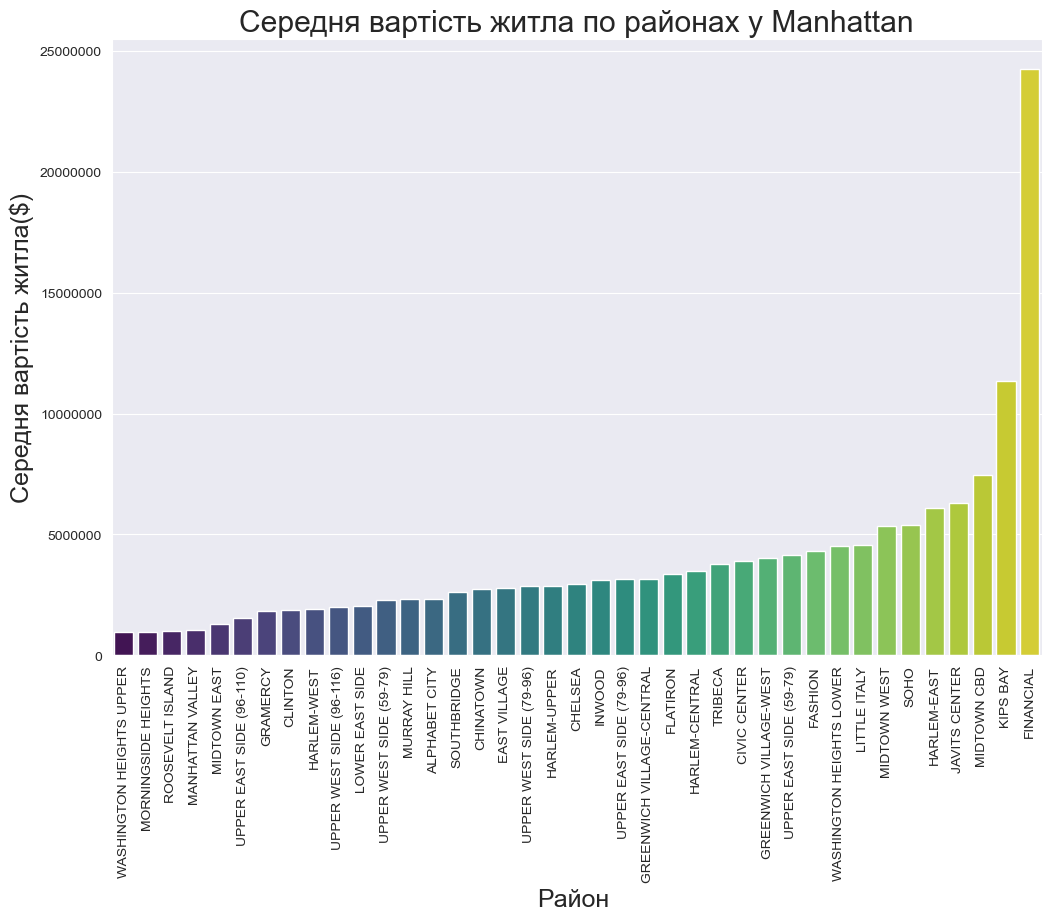

In [56]:
manhattan_data = df[(df['BOROUGH'] == 'Manhattan') & (df['SALE PRICE'] > 50)]

avg_price_by_neighborhood = manhattan_data.groupby('NEIGHBORHOOD')['SALE PRICE'].mean().sort_values()

plt.figure(figsize=(12, 8))
sns.barplot(x=avg_price_by_neighborhood.index, y=avg_price_by_neighborhood.values, palette='viridis')
plt.title('Середня вартість житла по районах у Manhattan')
plt.xlabel('Район ')
plt.ylabel('Середня вартість житла($)')

plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)

plt.ticklabel_format(style='plain', axis='y')

plt.show()

Таким чином найбільші ціни у Financial районі, в той час як найменші в Manhattan valley

In [57]:
overall_avg_price_manhattan = manhattan_data['SALE PRICE'].mean()

print(f"Загальна середня вартість житла на Манхеттені: ${overall_avg_price_manhattan:.2f}")

Загальна середня вартість житла на Манхеттені: $3906959.86


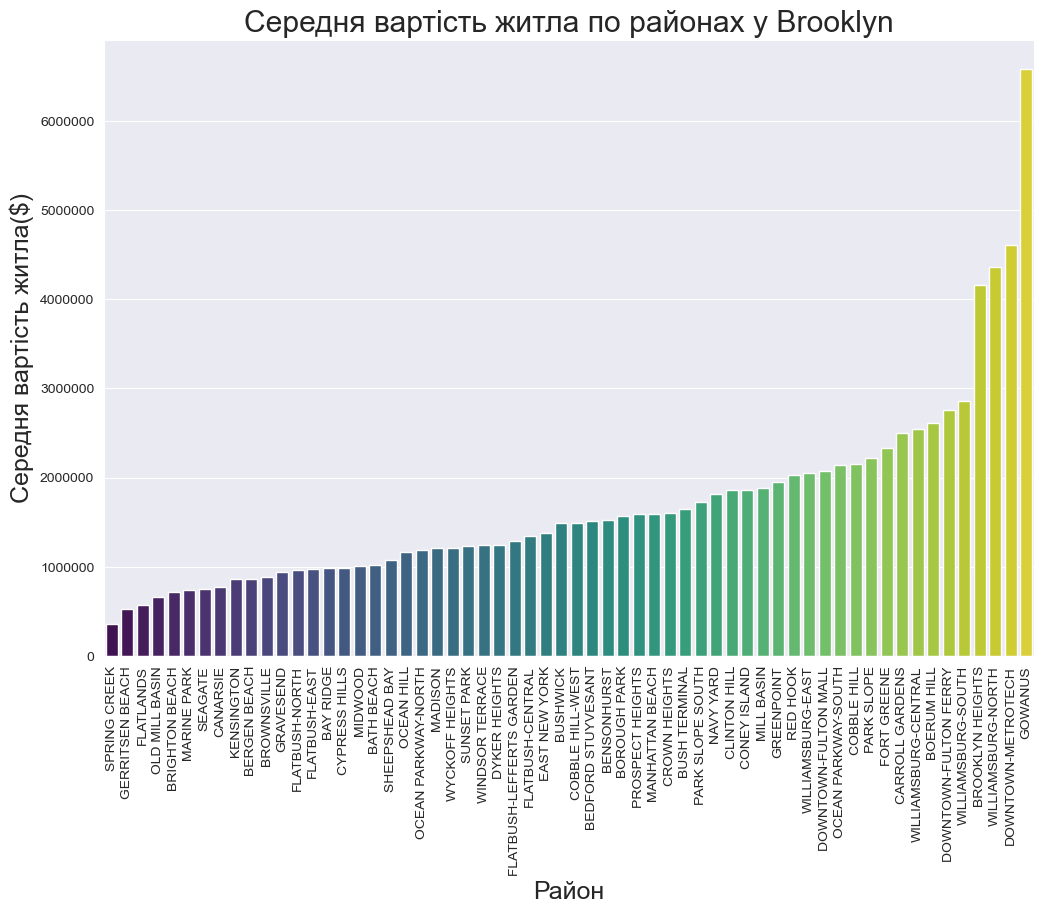

In [58]:

brooklyn_data = df[(df['BOROUGH'] == 'Brooklyn') & (df['SALE PRICE'] > 50)]


avg_price_by_neighborhood = brooklyn_data.groupby('NEIGHBORHOOD')['SALE PRICE'].mean().sort_values()


plt.figure(figsize=(12, 8))
sns.barplot(x=avg_price_by_neighborhood.index, y=avg_price_by_neighborhood.values, palette='viridis')
plt.title('Середня вартість житла по районах у Brooklyn')
plt.xlabel('Район')
plt.ylabel('Середня вартість житла($)')
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.ticklabel_format(style='plain', axis='y')

plt.show()

In [59]:
overall_avg_price_brooklyn = brooklyn_data['SALE PRICE'].mean()

print(f"Загальна середня вартість житла на Брукліні: ${overall_avg_price_brooklyn:.2f}")

Загальна середня вартість житла на Брукліні: $1648525.81


Найбільша ціна на Брукліні в районі Gowanus, найнижча в районі Spring Creek 

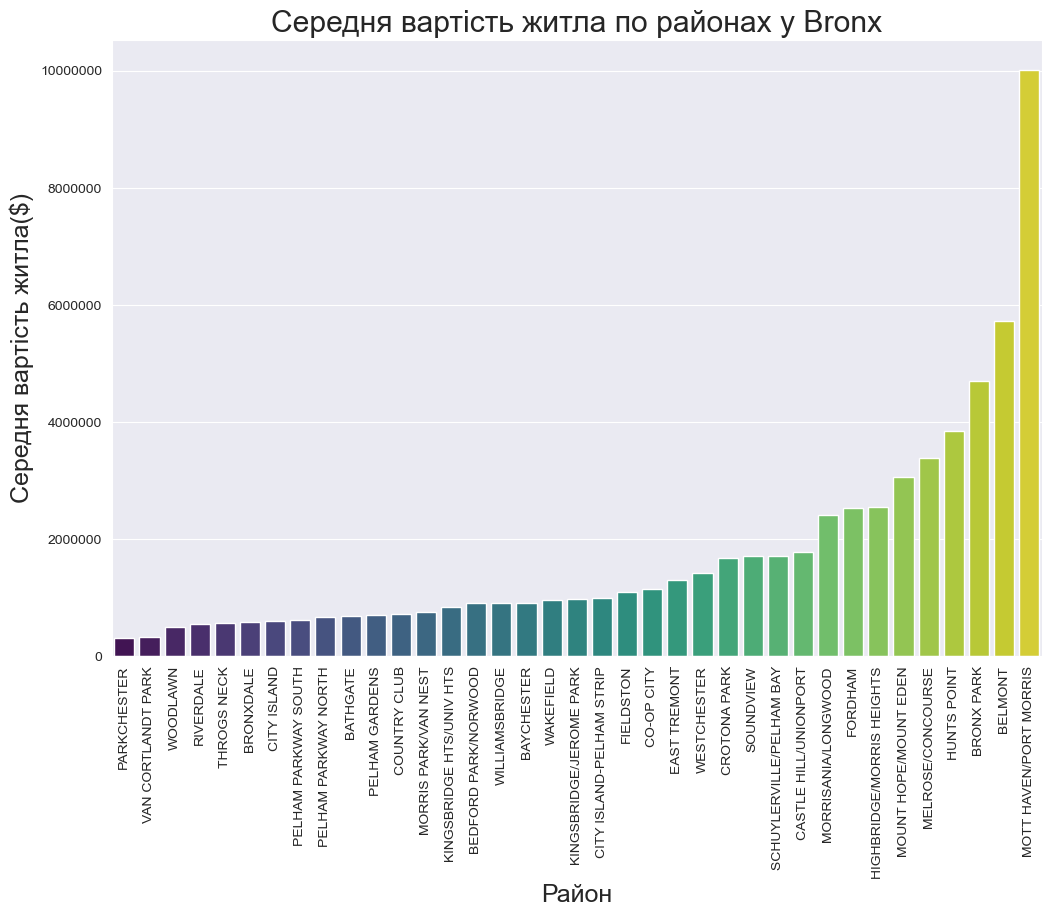

In [60]:

bronx_data = df[(df['BOROUGH'] == 'Bronx') & (df['SALE PRICE'] > 50)]

avg_price_by_neighborhood = bronx_data.groupby('NEIGHBORHOOD')['SALE PRICE'].mean().sort_values()

plt.figure(figsize=(12, 8))
sns.barplot(x=avg_price_by_neighborhood.index, y=avg_price_by_neighborhood.values, palette='viridis')
plt.title('Середня вартість житла по районах у Bronx')
plt.xlabel('Район')
plt.ylabel('Середня вартість житла($)')
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.ticklabel_format(style='plain', axis='y')

plt.show()


In [61]:
overall_avg_price_bronx = bronx_data['SALE PRICE'].mean()

print(f"Загальна середня вартість житла на Бронксі: ${overall_avg_price_bronx:.2f}")

Загальна середня вартість житла на Бронксі: $1329580.60


Найбільша ціна на Бронксі в районі Mott Haven/Port Morris, найнижча в районі Parkchester 

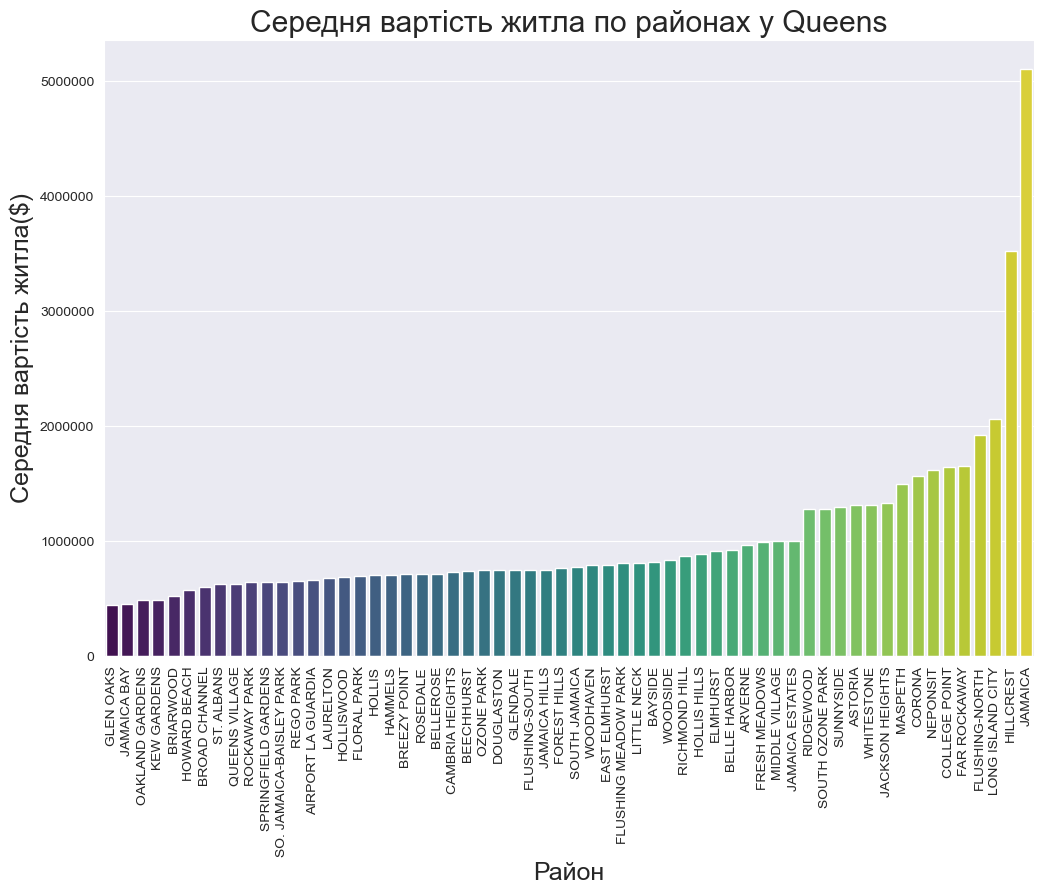

In [62]:

queens_data = df[(df['BOROUGH'] == 'Queens') & (df['SALE PRICE'] > 50)]

avg_price_by_neighborhood = queens_data.groupby('NEIGHBORHOOD')['SALE PRICE'].mean().sort_values()

plt.figure(figsize=(12, 8))
sns.barplot(x=avg_price_by_neighborhood.index, y=avg_price_by_neighborhood.values, palette='viridis')
plt.title('Середня вартість житла по районах у Queens')
plt.xlabel('Район')
plt.ylabel('Середня вартість житла($)')
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.ticklabel_format(style='plain', axis='y')

plt.show()


In [63]:
overall_avg_price_queens = queens_data['SALE PRICE'].mean()

print(f"Загальна середня вартість житла у Квінсі: ${overall_avg_price_queens:.2f}")

Загальна середня вартість житла у Квінсі: $1144886.33


Найбільша ціна на Квінс в районі Jamaica, найнижча в районі Glen Oaks 

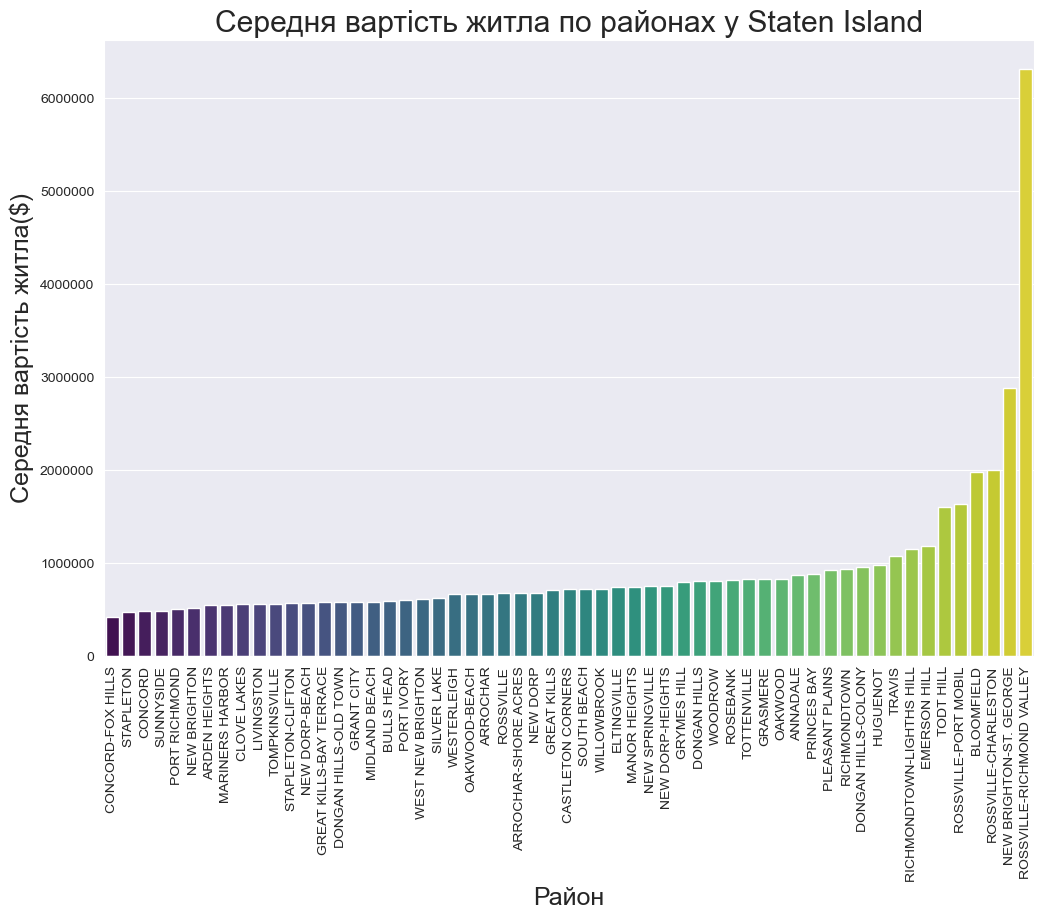

In [64]:
staten_island_data = df[(df['BOROUGH'] == 'Staten Island') & (df['SALE PRICE'] > 50)]

avg_price_by_neighborhood = staten_island_data.groupby('NEIGHBORHOOD')['SALE PRICE'].mean().sort_values()

plt.figure(figsize=(12, 8))
sns.barplot(x=avg_price_by_neighborhood.index, y=avg_price_by_neighborhood.values, palette='viridis')
plt.title('Середня вартість житла по районах у Staten Island')
plt.xlabel('Район')
plt.ylabel('Середня вартість житла($)')
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.ticklabel_format(style='plain', axis='y')

plt.show()

In [29]:
overall_avg_price_staten_island = staten_island_data['SALE PRICE'].mean()

print(f"Загальна середня вартість житла на Стейтен Айленді: ${overall_avg_price_staten_island:.2f}")

Загальна середня вартість житла на Стейтен Айленді: $771469.64


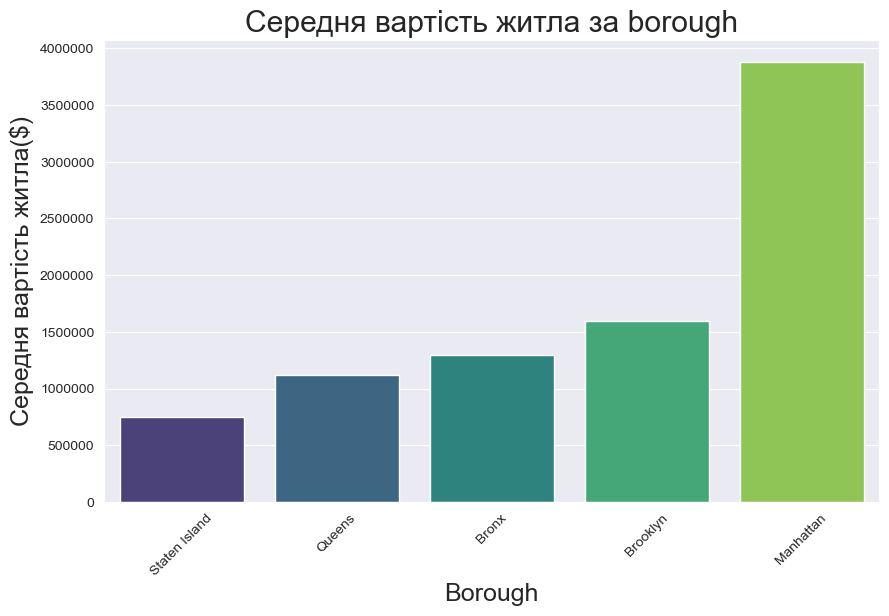

In [65]:
filtered_data = df[df['SALE PRICE'] > 0]


avg_price_by_borough = filtered_data.groupby('BOROUGH')['SALE PRICE'].mean().sort_values()


plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_by_borough.index, y=avg_price_by_borough.values, palette='viridis')
plt.title('Середня вартість житла за borough')
plt.xlabel('Borough')
plt.ylabel('Середня вартість житла($)')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.ticklabel_format(style='plain', axis='y')

plt.show()

З цього можна зробити висновок що ринок нерухомості в Нью Йорку є надзвичайно неоднорідним та залежить як від borough так і від neighborhood в них.


In [66]:

ny_data = df[df['BOROUGH'].isin(['Manhattan', 'Bronx', 'Brooklyn', 'Queens', 'Staten Island'])]
ny_data = ny_data[ny_data['TOTAL UNITS'] != '']

ny_data['TOTAL UNITS'] = pd.to_numeric(ny_data['TOTAL UNITS'], errors='coerce')

ny_data_filtered = ny_data[ny_data['SALE PRICE'] > 50]

total_units_sold = ny_data_filtered['TOTAL UNITS'].sum()

print(f"Загальна кількість проданої нерухомості в Нью-Йорку: {total_units_sold}")

Загальна кількість проданої нерухомості в Нью-Йорку: 160935.0


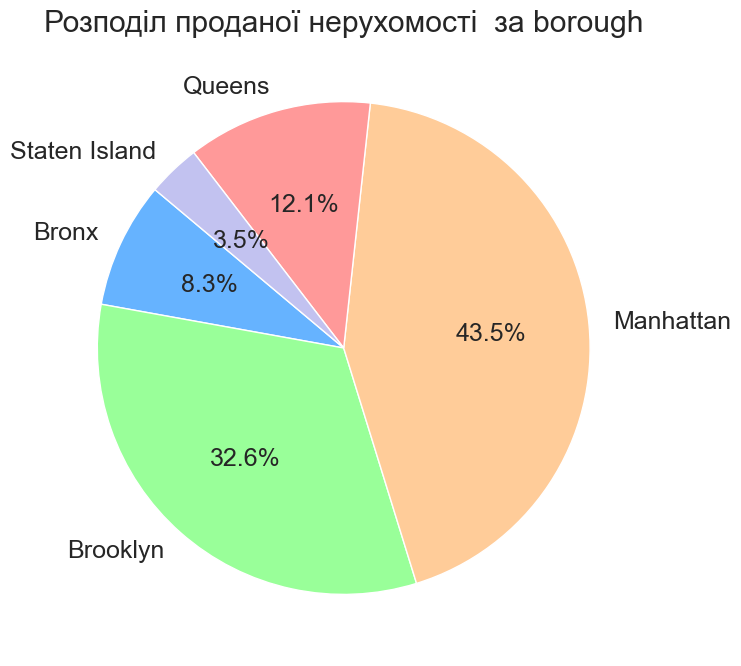

In [67]:

units_by_borough = ny_data_filtered.groupby('BOROUGH')['TOTAL UNITS'].sum()
plt.figure(figsize=(8, 8))
plt.pie(units_by_borough, labels=units_by_borough.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#99ff99','#ffcc99','#ff9999','#c2c2f0'])
plt.title('Розподіл проданої нерухомості  за borough')

plt.show()


Таким чином найбільше нерухомості було продано на Манхетені, найменше на стейтен Айленді

In [70]:

ny_data = df[df['BOROUGH'].isin(['Manhattan', 'Bronx', 'Brooklyn', 'Queens', 'Staten Island'])]
ny_data = ny_data[ny_data['TOTAL UNITS'] != '']

ny_data['TOTAL UNITS'] = pd.to_numeric(ny_data['TOTAL UNITS'], errors='coerce')

ny_data_filtered = ny_data[
    (ny_data['SALE PRICE'] > 50) & 
    (ny_data['SALE DATE'].dt.year <= 2023) & 
    ((ny_data['SALE DATE'].dt.year < 2023) | (ny_data['SALE DATE'].dt.month <= 4))
]

total_units_sold = ny_data_filtered['TOTAL UNITS'].sum()

print(f"Загальна кількість проданих житлових одиниць в Нью-Йорку до 30 квітня 2023 року: {total_units_sold}")


Загальна кількість проданих житлових одиниць в Нью-Йорку до 30 квітня 2023 року: 105835.0


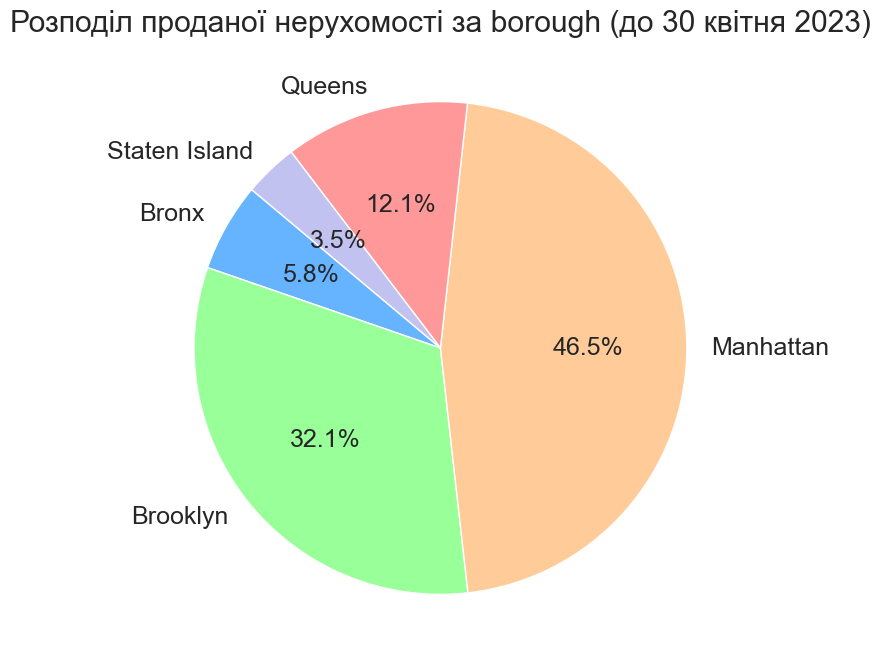

In [71]:
ny_data = df[df['BOROUGH'].isin(['Manhattan', 'Bronx', 'Brooklyn', 'Queens', 'Staten Island'])]
ny_data = ny_data[ny_data['TOTAL UNITS'] != '']

ny_data['TOTAL UNITS'] = pd.to_numeric(ny_data['TOTAL UNITS'], errors='coerce')

ny_data_filtered = ny_data[
    (ny_data['SALE PRICE'] > 50) & 
    (ny_data['SALE DATE'].dt.year <= 2023) & 
    ((ny_data['SALE DATE'].dt.year < 2023) | (ny_data['SALE DATE'].dt.month <= 4))
]

units_by_borough = ny_data_filtered.groupby('BOROUGH')['TOTAL UNITS'].sum()

plt.figure(figsize=(8, 8))
plt.pie(units_by_borough, labels=units_by_borough.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#99ff99','#ffcc99','#ff9999','#c2c2f0'])
plt.title('Розподіл проданої нерухомості за borough (до 30 квітня 2023)')

plt.show()

In [72]:

ny_data = df[df['BOROUGH'].isin(['Manhattan', 'Bronx', 'Brooklyn', 'Queens', 'Staten Island'])]
ny_data = ny_data[ny_data['TOTAL UNITS'] != '']

ny_data['TOTAL UNITS'] = pd.to_numeric(ny_data['TOTAL UNITS'], errors='coerce')

ny_data_filtered = ny_data[
    (ny_data['SALE PRICE'] > 50) & 
    (ny_data['SALE DATE'] > '2023-04-30')
]

total_units_sold = ny_data_filtered['TOTAL UNITS'].sum()

print(f"Загальна кількість проданих житлових одиниць в Нью-Йорку після 30 квітня 2023 року: {total_units_sold}")


Загальна кількість проданих житлових одиниць в Нью-Йорку після 30 квітня 2023 року: 55100.0


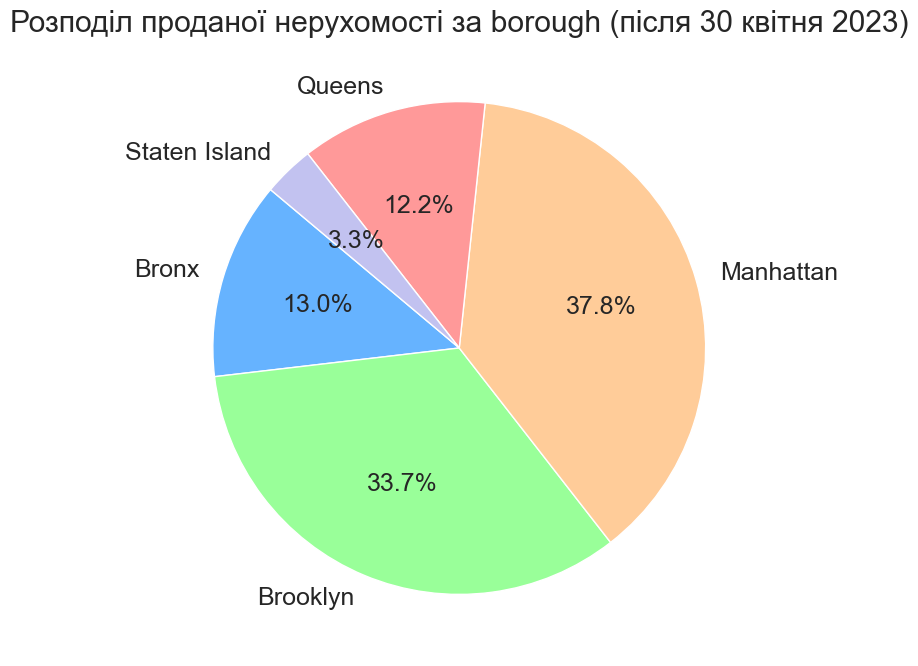

In [73]:

ny_data = df[df['BOROUGH'].isin(['Manhattan', 'Bronx', 'Brooklyn', 'Queens', 'Staten Island'])]
ny_data = ny_data[ny_data['TOTAL UNITS'] != '']

ny_data['TOTAL UNITS'] = pd.to_numeric(ny_data['TOTAL UNITS'], errors='coerce')

ny_data_filtered = ny_data[
    (ny_data['SALE PRICE'] > 50) & 
    (ny_data['SALE DATE'] > '2023-04-30')
]

units_by_borough = ny_data_filtered.groupby('BOROUGH')['TOTAL UNITS'].sum()

plt.figure(figsize=(8, 8))
plt.pie(units_by_borough, labels=units_by_borough.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#99ff99','#ffcc99','#ff9999','#c2c2f0'])
plt.title('Розподіл проданої нерухомості за borough (після 30 квітня 2023)')

plt.show()


Таким чином видно що продажі знизилися, у першій половині періоду вони були значно вищі ніж зараз. Крім того змінився й розподіл по borough, хоч на манхетені й досі продається більша частина нерухомості проте його вже наздоганяє Бруклін

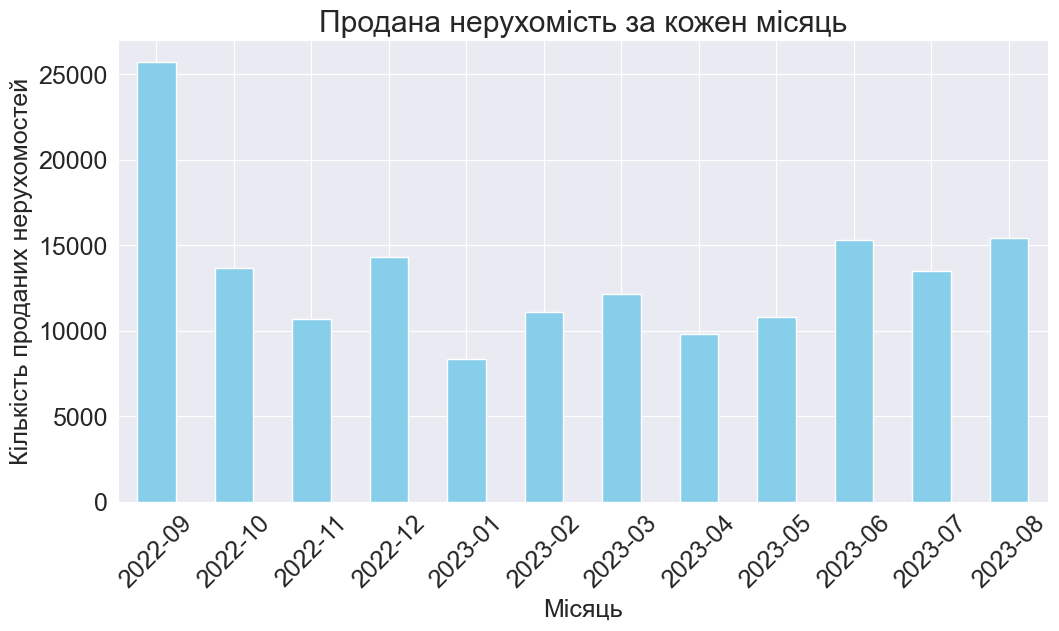

In [74]:

ny_data = df[df['BOROUGH'].isin(['Manhattan', 'Bronx', 'Brooklyn', 'Queens', 'Staten Island'])]
ny_data = ny_data[ny_data['TOTAL UNITS'] != '']

ny_data['TOTAL UNITS'] = pd.to_numeric(ny_data['TOTAL UNITS'], errors='coerce')

ny_data_filtered = ny_data[(ny_data['SALE PRICE'] > 50)]

ny_data_filtered['SALE MONTH'] = ny_data_filtered['SALE DATE'].dt.to_period('M')

units_by_month = ny_data_filtered.groupby('SALE MONTH')['TOTAL UNITS'].sum()

plt.figure(figsize=(12, 6))
units_by_month.plot(kind='bar', color='skyblue')
plt.title('Продана нерухомість за кожен місяць')
plt.xlabel('Місяць')
plt.ylabel('Кількість проданих нерухомостей')
plt.xticks(rotation=45)
plt.show()


Проте якщо брати динаміку по місяцям видно що найбільші продажі були ще у вересні 2020, після чого було падіння до січня, а далі ринок стабілізувався, проте продажі все одно залишаються значно нищими

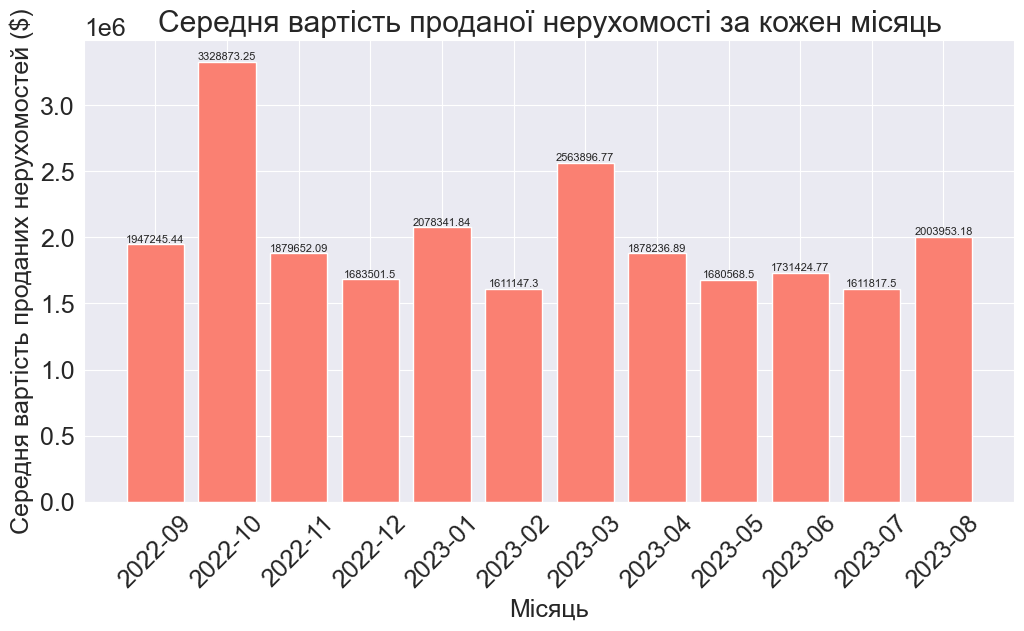

In [79]:

ny_data_filtered['SALE MONTH'] = ny_data_filtered['SALE DATE'].dt.to_period('M')

avg_price_by_month = ny_data_filtered.groupby('SALE MONTH')['SALE PRICE'].mean()

plt.figure(figsize=(12, 6))
bars = plt.bar(avg_price_by_month.index.astype(str), avg_price_by_month, color='salmon')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=8)

plt.title('Середня вартість проданої нерухомості за кожен місяць')
plt.xlabel('Місяць')
plt.ylabel('Середня вартість проданих нерухомостей ($)')
plt.xticks(rotation=45)
plt.show()


Таким чином з графіку видно що продажі знизилися після різкого підняття цін, і загалом після підняття цін на наступний місяць знижуються й продажі, після зниження навпаки

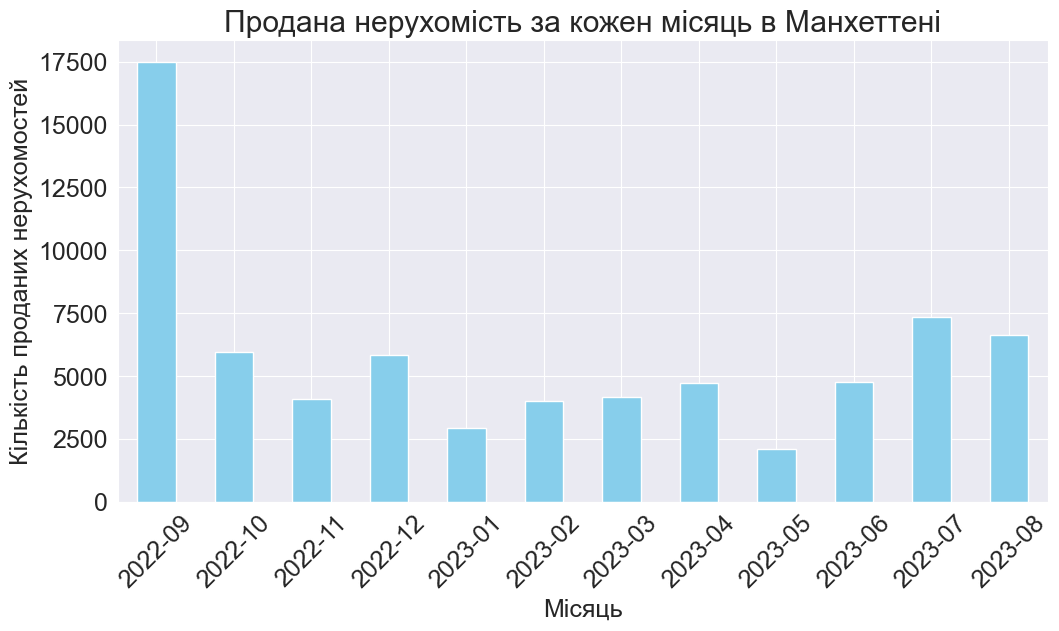

In [80]:

manhattan_data = manhattan_data[manhattan_data['TOTAL UNITS'] != '']

manhattan_data['TOTAL UNITS'] = pd.to_numeric(manhattan_data['TOTAL UNITS'], errors='coerce')

manhattan_data_filtered = manhattan_data[(manhattan_data['SALE PRICE'] > 50)]

manhattan_data_filtered['SALE MONTH'] = manhattan_data_filtered['SALE DATE'].dt.to_period('M')

units_by_month = manhattan_data_filtered.groupby('SALE MONTH')['TOTAL UNITS'].sum()

plt.figure(figsize=(12, 6))
units_by_month.plot(kind='bar', color='skyblue')
plt.title('Продана нерухомість за кожен місяць в Манхеттені')
plt.xlabel('Місяць')
plt.ylabel('Кількість проданих нерухомостей')
plt.xticks(rotation=45)
plt.show()


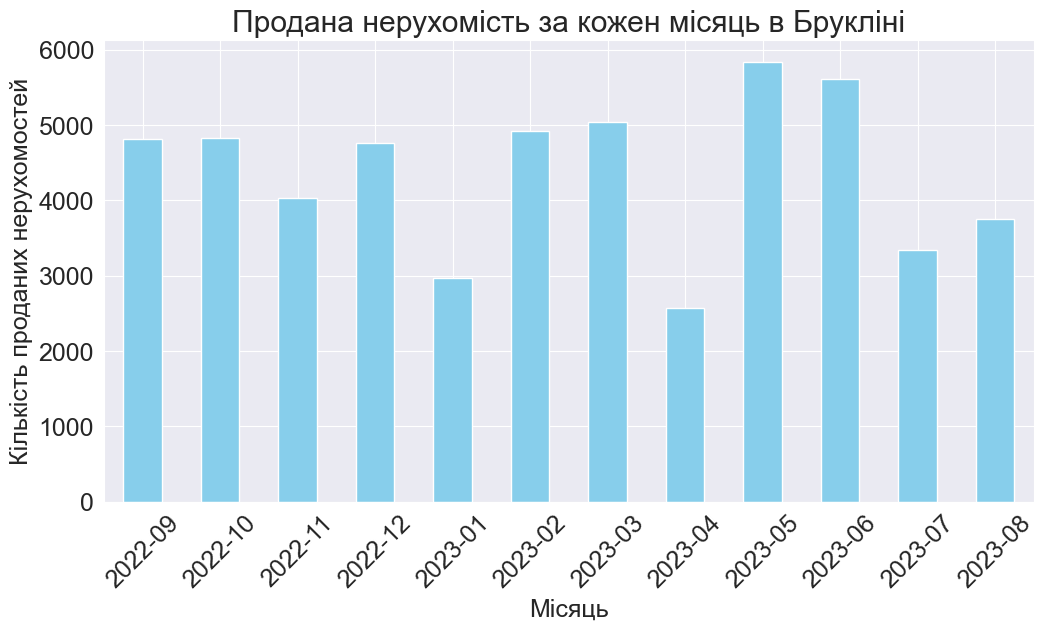

In [81]:

brooklyn_data = brooklyn_data[brooklyn_data['TOTAL UNITS'] != '']

brooklyn_data['TOTAL UNITS'] = pd.to_numeric(brooklyn_data['TOTAL UNITS'], errors='coerce')

brooklyn_data_filtered = brooklyn_data[(brooklyn_data['SALE PRICE'] > 50)]

brooklyn_data_filtered['SALE MONTH'] = brooklyn_data_filtered['SALE DATE'].dt.to_period('M')

units_by_month = brooklyn_data_filtered.groupby('SALE MONTH')['TOTAL UNITS'].sum()

plt.figure(figsize=(12, 6))
units_by_month.plot(kind='bar', color='skyblue')
plt.title('Продана нерухомість за кожен місяць в Брукліні')
plt.xlabel('Місяць')
plt.ylabel('Кількість проданих нерухомостей')
plt.xticks(rotation=45)
plt.show()


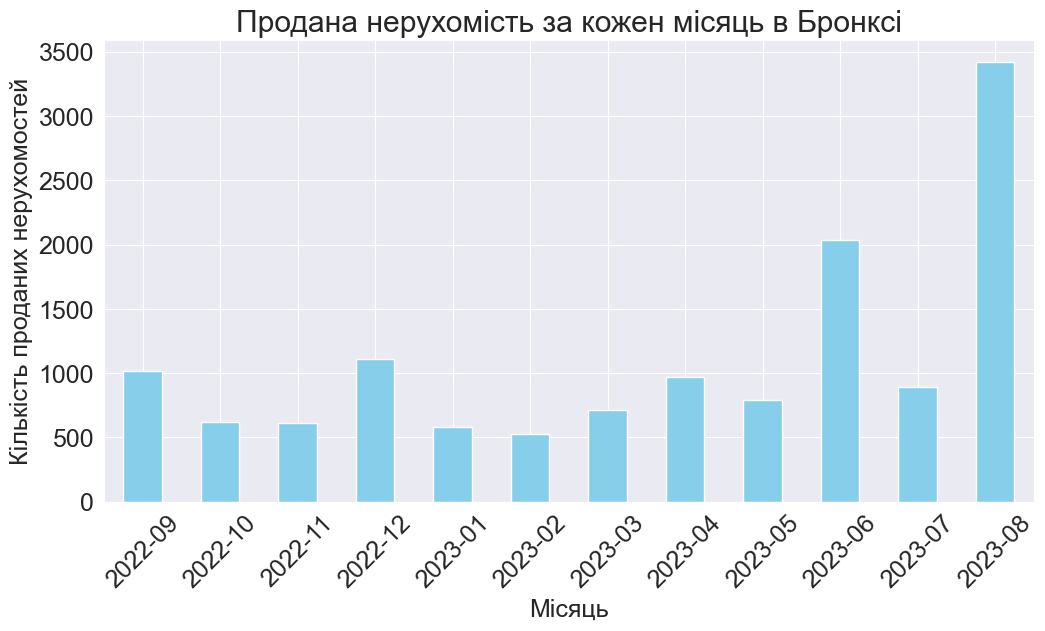

In [82]:

bronx_data = bronx_data[bronx_data['TOTAL UNITS'] != '']

bronx_data['TOTAL UNITS'] = pd.to_numeric(bronx_data['TOTAL UNITS'], errors='coerce')

bronx_data_filtered = bronx_data[(bronx_data['SALE PRICE'] > 50)]

bronx_data_filtered['SALE MONTH'] = bronx_data_filtered['SALE DATE'].dt.to_period('M')

units_by_month = bronx_data_filtered.groupby('SALE MONTH')['TOTAL UNITS'].sum()

plt.figure(figsize=(12, 6))
units_by_month.plot(kind='bar', color='skyblue')
plt.title('Продана нерухомість за кожен місяць в Бронксі')
plt.xlabel('Місяць')
plt.ylabel('Кількість проданих нерухомостей')
plt.xticks(rotation=45)
plt.show()


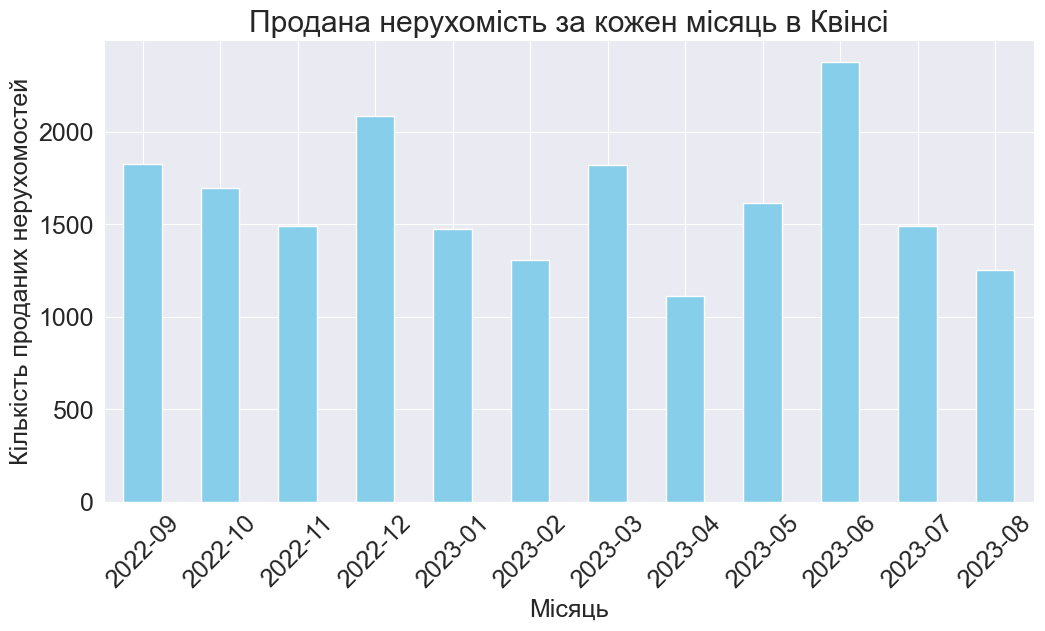

In [83]:

queens_data = queens_data[queens_data['TOTAL UNITS'] != '']

queens_data['TOTAL UNITS'] = pd.to_numeric(queens_data['TOTAL UNITS'], errors='coerce')

queens_data_filtered = queens_data[(queens_data['SALE PRICE'] > 50)]

queens_data_filtered['SALE MONTH'] = queens_data_filtered['SALE DATE'].dt.to_period('M')

units_by_month = queens_data_filtered.groupby('SALE MONTH')['TOTAL UNITS'].sum()

plt.figure(figsize=(12, 6))
units_by_month.plot(kind='bar', color='skyblue')
plt.title('Продана нерухомість за кожен місяць в Квінсі')
plt.xlabel('Місяць')
plt.ylabel('Кількість проданих нерухомостей')
plt.xticks(rotation=45)
plt.show()


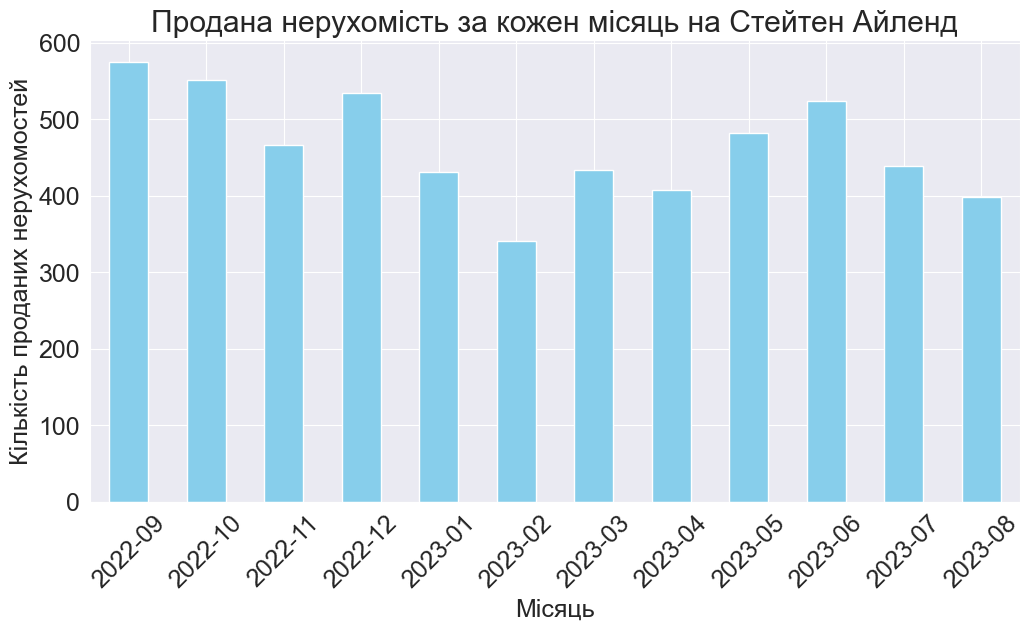

In [84]:

staten_island_data = staten_island_data[staten_island_data['TOTAL UNITS'] != '']

staten_island_data['TOTAL UNITS'] = pd.to_numeric(staten_island_data['TOTAL UNITS'], errors='coerce')

staten_island_data_filtered = staten_island_data[(staten_island_data['SALE PRICE'] > 50)]

staten_island_data_filtered['SALE MONTH'] = staten_island_data_filtered['SALE DATE'].dt.to_period('M')

units_by_month = staten_island_data_filtered.groupby('SALE MONTH')['TOTAL UNITS'].sum()
plt.figure(figsize=(12, 6))
units_by_month.plot(kind='bar', color='skyblue')
plt.title('Продана нерухомість за кожен місяць на Стейтен Айленд')
plt.xlabel('Місяць')
plt.ylabel('Кількість проданих нерухомостей')
plt.xticks(rotation=45)
plt.show()


Таким чином найбільше падіння продажів було зафіксовано на манхетені, найбільший ріст на Бронксі, в інших місцях продажі були більш стабільними

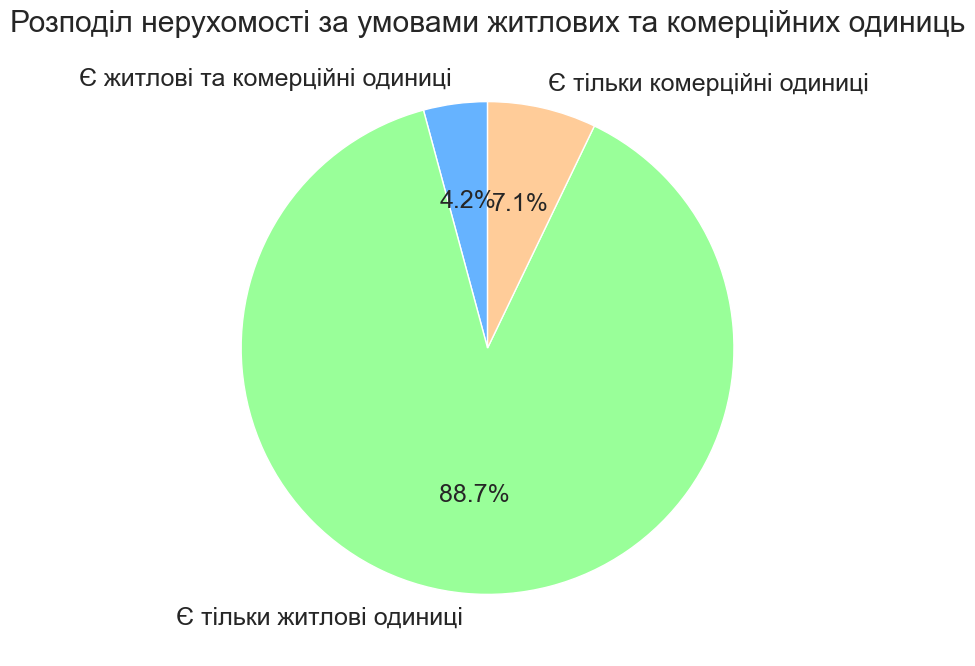

In [89]:
import pandas as pd
import matplotlib.pyplot as plt

filtered_data = df[(pd.to_numeric(df['RESIDENTIAL UNITS'], errors='coerce').fillna(0) > 0) & 
                   (pd.to_numeric(df['COMMERCIAL UNITS'], errors='coerce').fillna(0) > 0)]

labels = ['Є житлові та комерційні одиниці', 'Є тільки житлові одиниці', 'Є тільки комерційні одиниці']
sizes = [
    len(filtered_data),
    len(df[(pd.to_numeric(df['RESIDENTIAL UNITS'], errors='coerce').fillna(0) > 0) & 
           (pd.to_numeric(df['COMMERCIAL UNITS'], errors='coerce').fillna(0) == 0)]),
    len(df[(pd.to_numeric(df['RESIDENTIAL UNITS'], errors='coerce').fillna(0) == 0) & 
           (pd.to_numeric(df['COMMERCIAL UNITS'], errors='coerce').fillna(0) > 0)])
]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99', '#ffcc99'])
plt.title('Розподіл нерухомості за умовами житлових та комерційних одиниць')
plt.show()


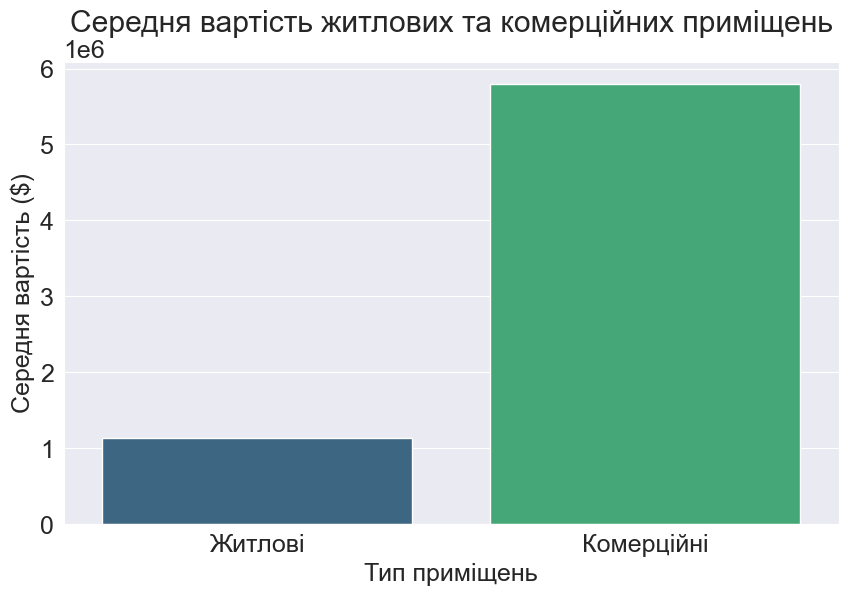

In [90]:

filtered_data = df[(pd.to_numeric(df['RESIDENTIAL UNITS'], errors='coerce').fillna(0) > 0) | 
                   (pd.to_numeric(df['COMMERCIAL UNITS'], errors='coerce').fillna(0) > 0)]

filtered_data['SALE PRICE'] = pd.to_numeric(filtered_data['SALE PRICE'], errors='coerce')

filtered_data['SALE PRICE'].fillna(0, inplace=True)


filtered_data['UNIT TYPE'] = ['Житлові' if res_units > 0 else 'Комерційні' for res_units in filtered_data['RESIDENTIAL UNITS']]

avg_price_by_unit_type = filtered_data.groupby('UNIT TYPE')['SALE PRICE'].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_by_unit_type.index, y=avg_price_by_unit_type.values, palette='viridis')
plt.title('Середня вартість житлових та комерційних приміщень')
plt.xlabel('Тип приміщень')
plt.ylabel('Середня вартість ($)')

plt.show()


Таким чином житлових приміщень більше, але ціна на них значно менша ніж на комерційні

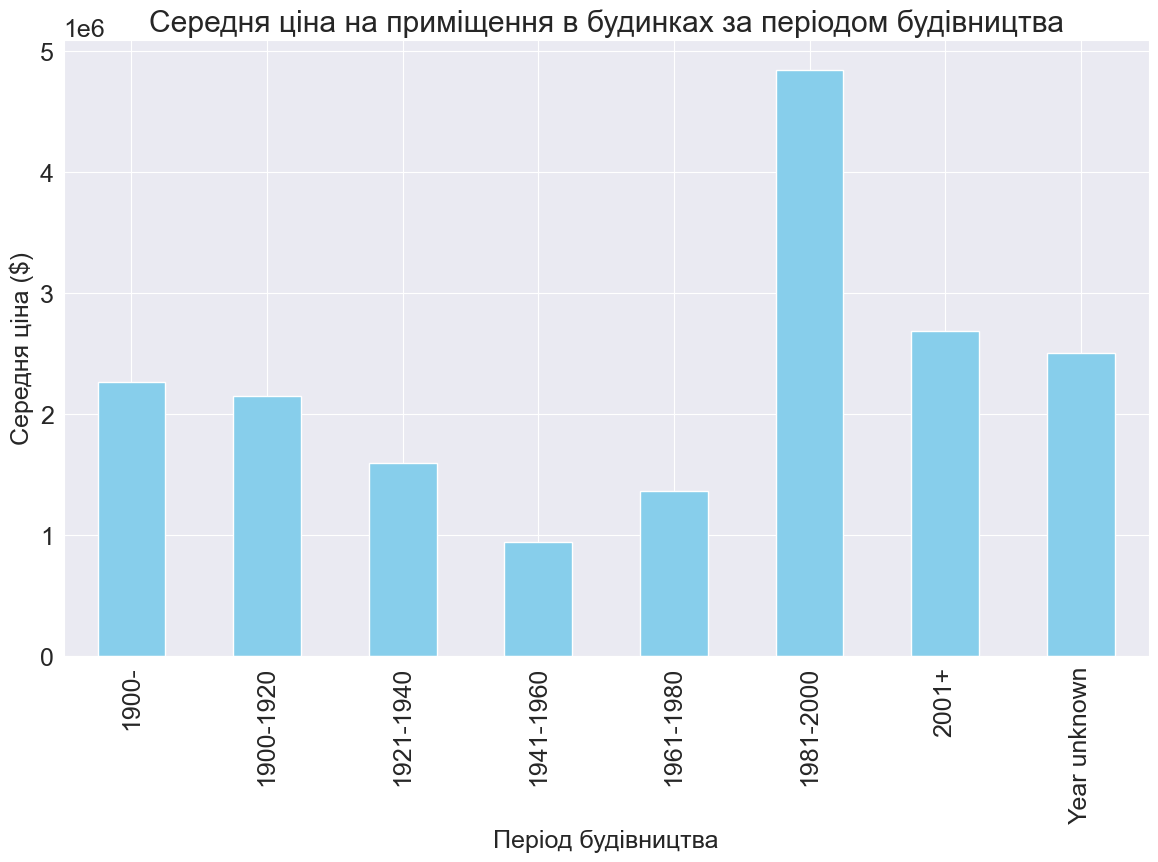

In [93]:
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'], errors='coerce')

df['SALE PRICE'].fillna(0, inplace=True)

df_filtered = df[df['SALE PRICE'] > 50]

avg_price_by_time_period = df_filtered.groupby('TIME PERIOD')['SALE PRICE'].mean().sort_index()

plt.figure(figsize=(14, 8))
avg_price_by_time_period.plot(kind='bar', color='skyblue')
plt.title('Середня ціна на приміщення в будинках за періодом будівництва')
plt.xlabel('Період будівництва')
plt.ylabel('Середня ціна ($)')

plt.show()


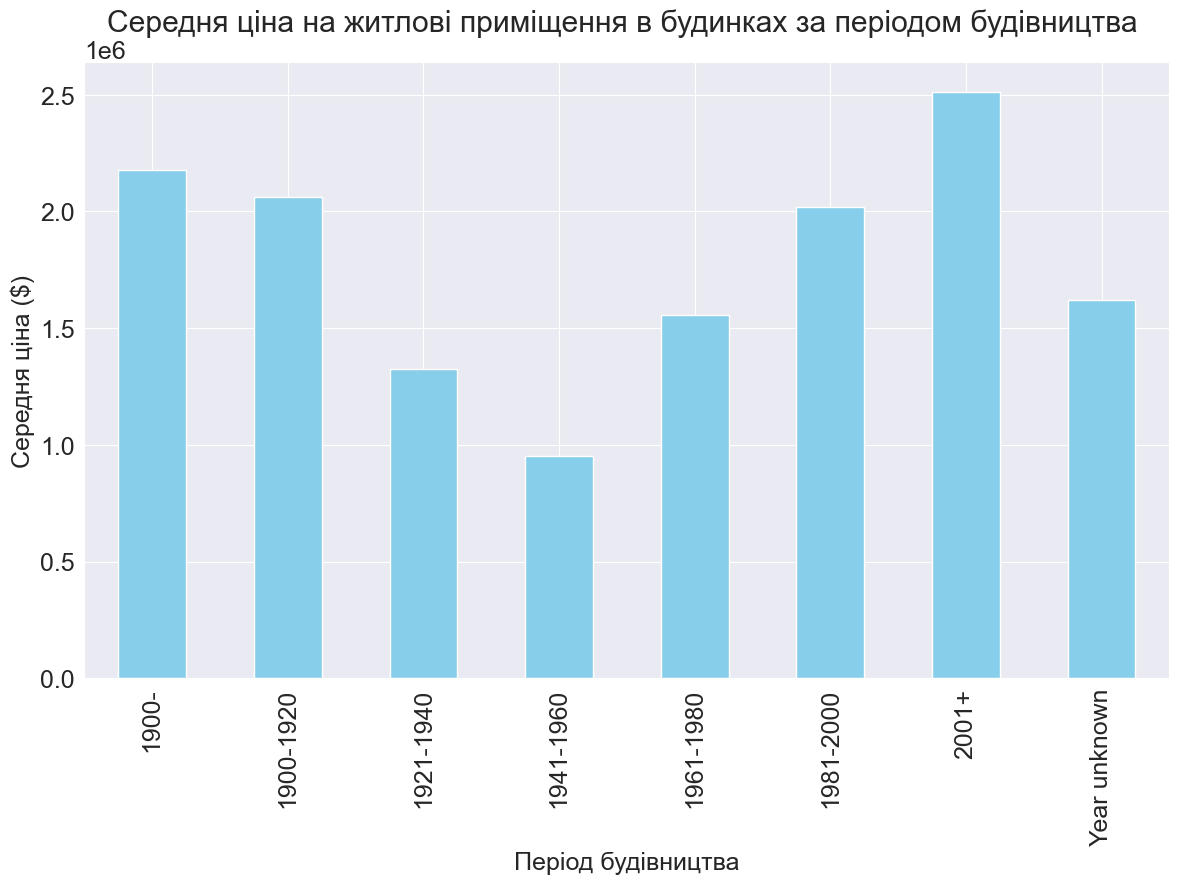

In [95]:

df_filtered = df[(df['SALE PRICE'] > 50) & (df['RESIDENTIAL UNITS'] > 0)]

avg_price_by_time_period = df_filtered.groupby('TIME PERIOD')['SALE PRICE'].mean().sort_index()

plt.figure(figsize=(14, 8))
avg_price_by_time_period.plot(kind='bar', color='skyblue')
plt.title('Середня ціна на житлові приміщення в будинках за періодом будівництва ')
plt.xlabel('Період будівництва')
plt.ylabel('Середня ціна ($)')

plt.show()

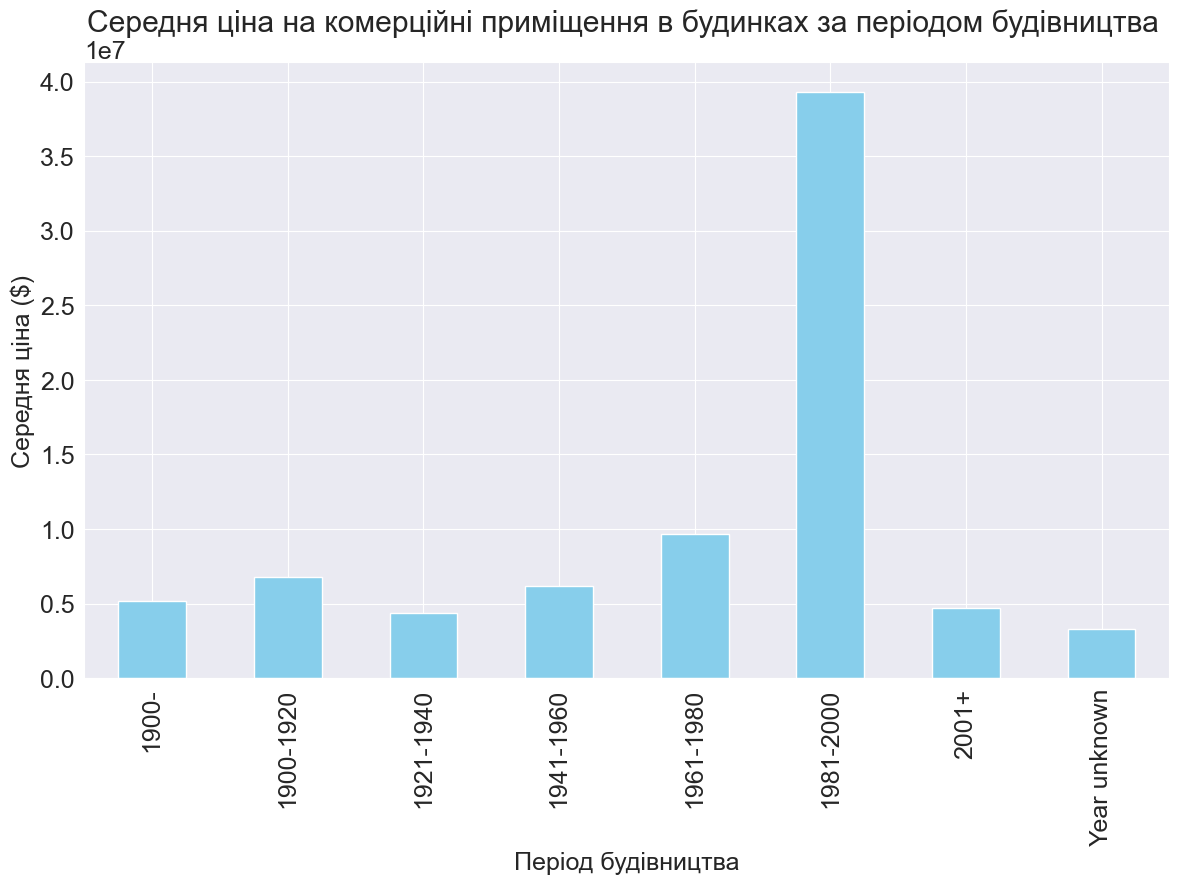

In [96]:
df_filtered = df[(df['SALE PRICE'] > 50) & (df['COMMERCIAL UNITS'] > 0)]

avg_price_by_time_period = df_filtered.groupby('TIME PERIOD')['SALE PRICE'].mean().sort_index()

plt.figure(figsize=(14, 8))
avg_price_by_time_period.plot(kind='bar', color='skyblue')
plt.title('Середня ціна на комерційні приміщення в будинках за періодом будівництва ')
plt.xlabel('Період будівництва')
plt.ylabel('Середня ціна ($)')

plt.show()

Таким чином за рахунок високих цін на комерційну нерухомість 1981-2000 загальні ціни є вищими, проте серед житлової нерухомості найдорожча сучасна забудова за нею йде створовинна. Найдешевше коштують приміщення в будівлях 1941-1960 року. 

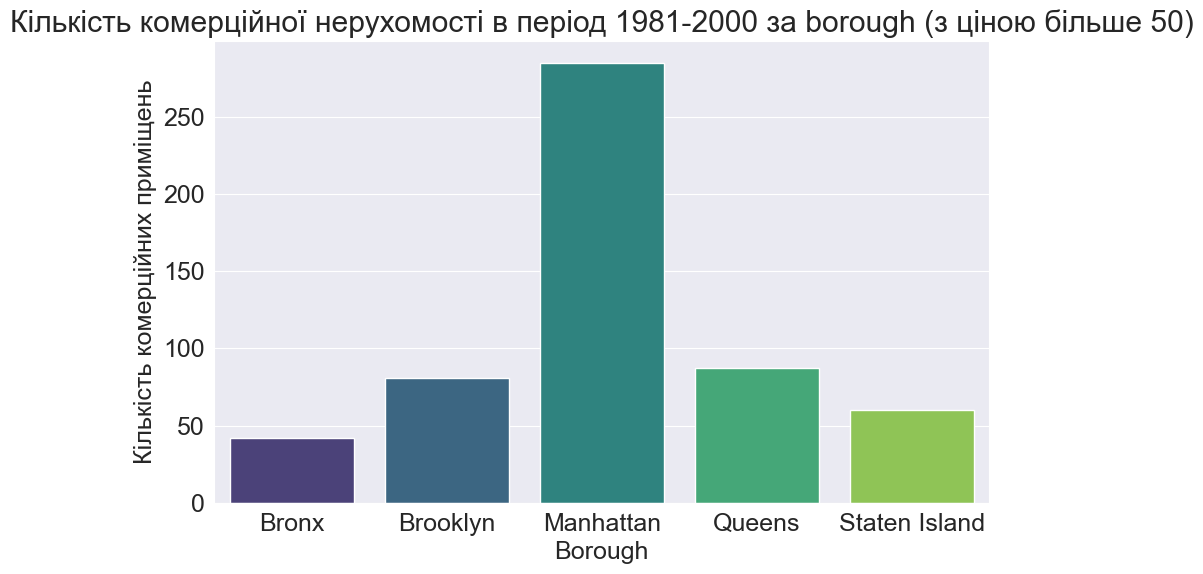

In [98]:

commercial_properties = df[(df['TIME PERIOD'] == '1981-2000') & (df['COMMERCIAL UNITS'] > 0) & (df['SALE PRICE'] > 50)]

commercial_units_by_borough = commercial_properties.groupby('BOROUGH')['COMMERCIAL UNITS'].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=commercial_units_by_borough.index, y=commercial_units_by_borough.values, palette='viridis')
plt.title('Кількість комерційної нерухомості в період 1981-2000 за borough (з ціною більше 50)')
plt.xlabel('Borough')
plt.ylabel('Кількість комерційних приміщень')

plt.show()

Оскільки комерційна нерухомість 1981-2000 року виявилася аномально дорогою то було вирішено перевірити у яких borough вона знаходиться. Як виявилося то найбільше на Манхеттені. Звідси й вищі ціни

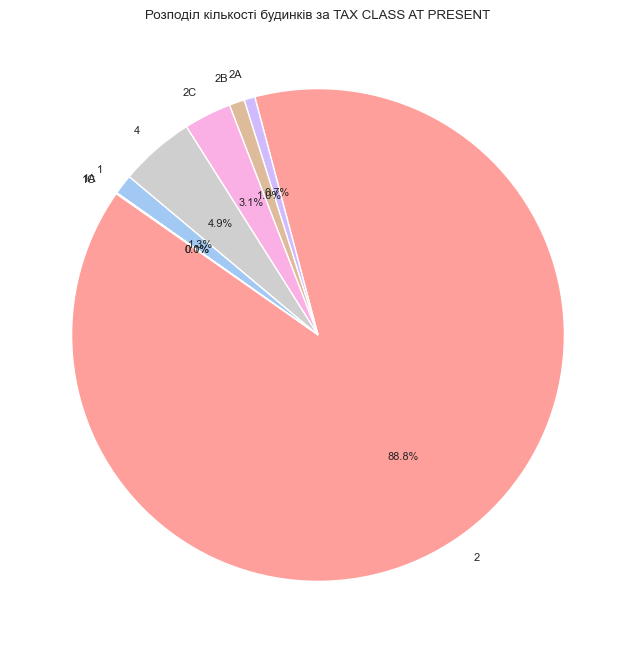

In [137]:

manhattan_data = df[(df['BOROUGH'] == 'Manhattan') & (df['SALE PRICE'] > 50)]

units_greater_than_zero = df[df['TOTAL UNITS'] > 0]

units_by_tax_class = manhattan_data .groupby('TAX CLASS AT PRESENT')['BOROUGH'].size()

plt.figure(figsize=(8, 8))
plt.rc('font', size=8)
plt.pie(units_by_tax_class, labels=units_by_tax_class.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Розподіл кількості будинків за TAX CLASS AT PRESENT')

plt.show()


У манхетені найбільше 2 класу 

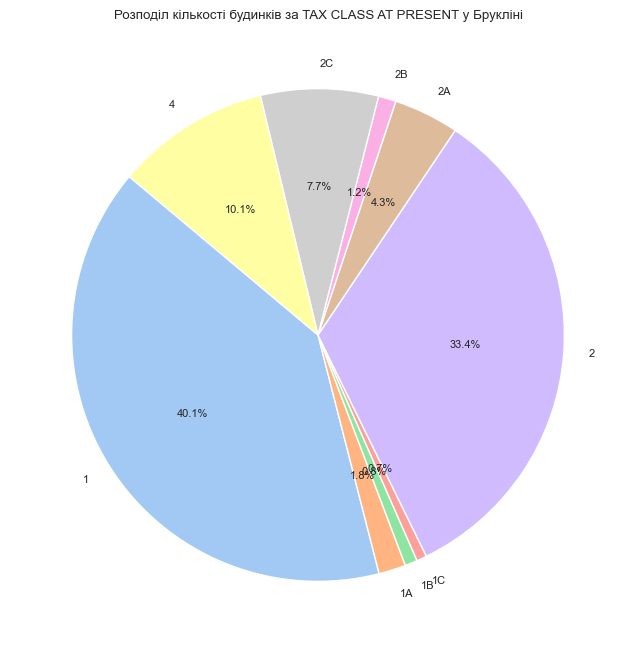

In [139]:
brooklyn_data = df[(df['BOROUGH'] == 'Brooklyn') & (df['SALE PRICE'] > 50)]

units_by_tax_class = brooklyn_data.groupby('TAX CLASS AT PRESENT')['BOROUGH'].size()

plt.figure(figsize=(8, 8))
plt.rc('font', size=8)
plt.pie(units_by_tax_class, labels=units_by_tax_class.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Розподіл кількості будинків за TAX CLASS AT PRESENT у Брукліні')

plt.show()


У брукліні першого та другого 

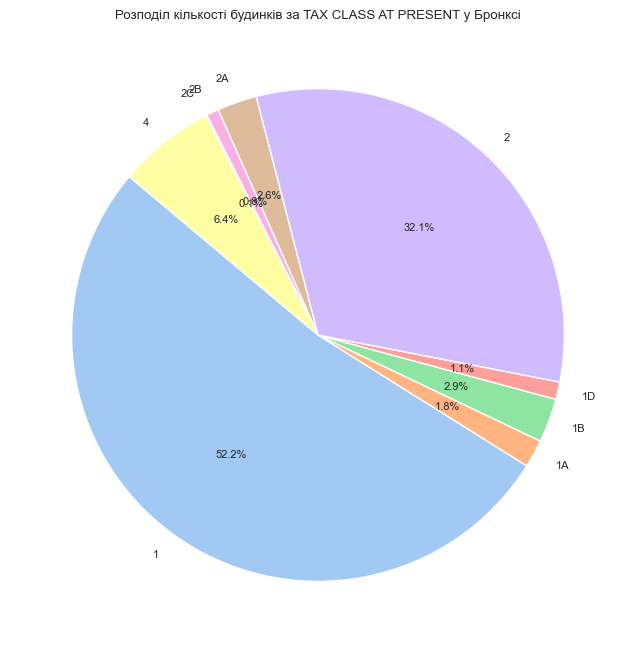

In [140]:
bronx_data = df[(df['BOROUGH'] == 'Bronx') & (df['SALE PRICE'] > 50)]

units_by_tax_class = bronx_data.groupby('TAX CLASS AT PRESENT')['BOROUGH'].size()

plt.figure(figsize=(8, 8))
plt.rc('font', size=8)
plt.pie(units_by_tax_class, labels=units_by_tax_class.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Розподіл кількості будинків за TAX CLASS AT PRESENT у Бронксі')

plt.show()


У бронксі більше першого

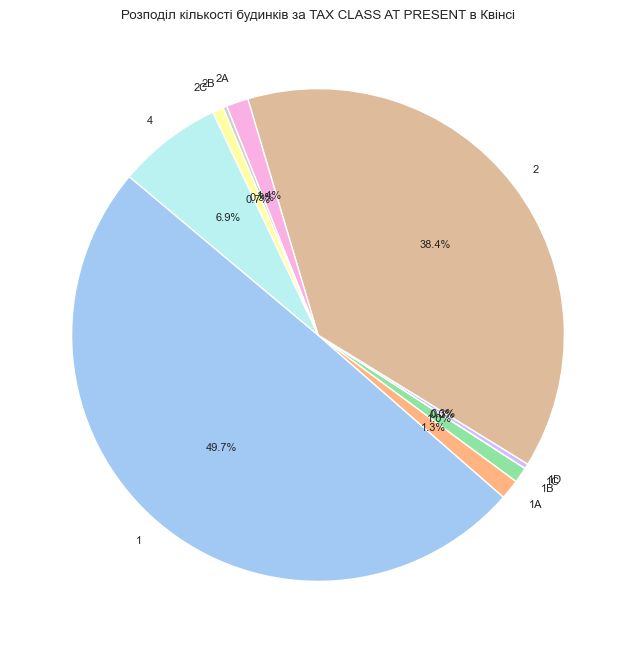

In [141]:
queens_data = df[(df['BOROUGH'] == 'Queens') & (df['SALE PRICE'] > 50)]

units_by_tax_class = queens_data.groupby('TAX CLASS AT PRESENT')['BOROUGH'].size()

plt.figure(figsize=(8, 8))
plt.rc('font', size=8)
plt.pie(units_by_tax_class, labels=units_by_tax_class.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Розподіл кількості будинків за TAX CLASS AT PRESENT в Квінсі')

plt.show()


У квінсі більше першого

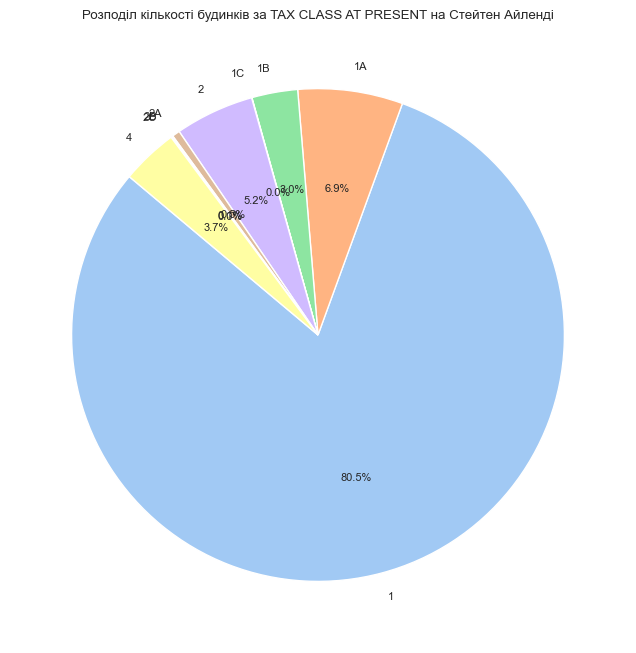

In [142]:
staten_island_data = df[(df['BOROUGH'] == 'Staten Island') & (df['SALE PRICE'] > 50)]

units_by_tax_class = staten_island_data.groupby('TAX CLASS AT PRESENT')['BOROUGH'].size()

plt.figure(figsize=(8, 8))
plt.rc('font', size=8)
plt.pie(units_by_tax_class, labels=units_by_tax_class.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Розподіл кількості будинків за TAX CLASS AT PRESENT на Стейтен Айленді')

plt.show()


У стейтен айленді найбільше першого. 

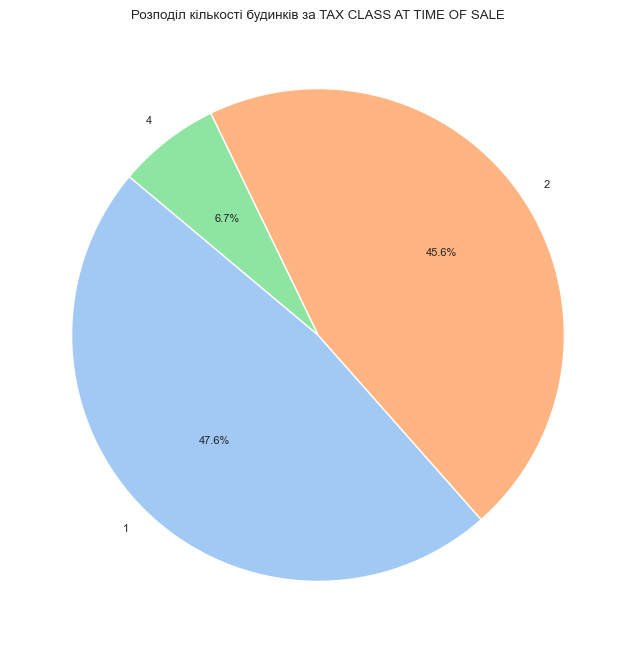

In [144]:

units_by_tax_class = df.groupby('TAX CLASS AT TIME OF SALE')['BOROUGH'].size()

plt.figure(figsize=(8, 8))
plt.pie(units_by_tax_class, labels=units_by_tax_class.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Розподіл кількості будинків за TAX CLASS AT TIME OF SALE')

plt.show()



Таким чином перший домінує в усіх Borrough крім Manhattan і загалом перший та другий найбільш розповсюджений

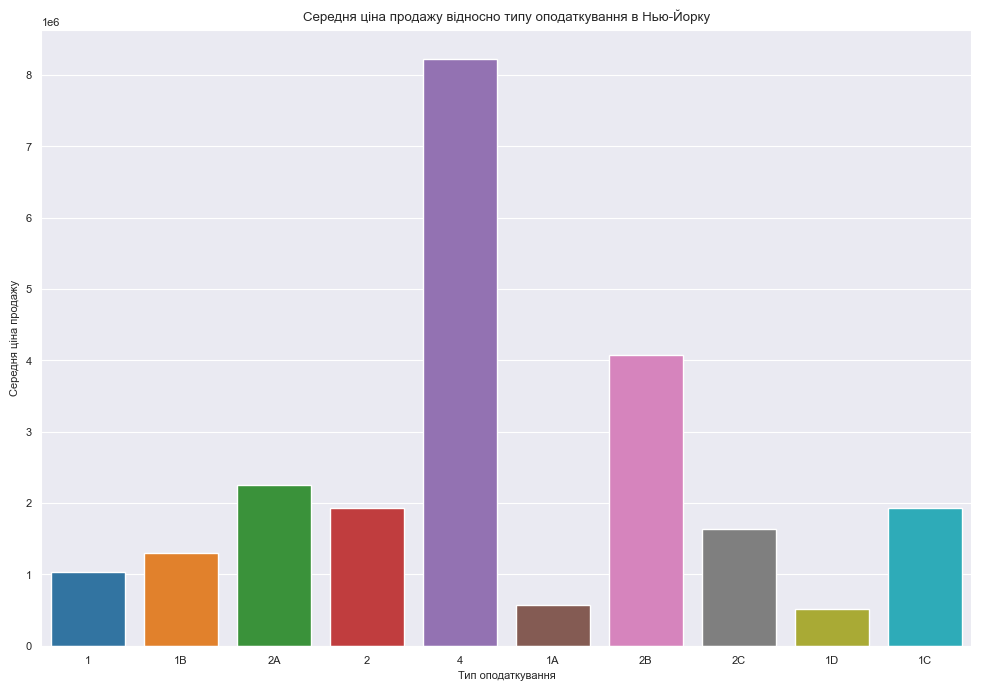

In [147]:

filtered_data = df[df['SALE PRICE'] > 50]

plt.figure(figsize=(12, 8))
sns.barplot(x='TAX CLASS AT PRESENT', y='SALE PRICE', data=filtered_data, estimator=np.mean, ci=None)
plt.title('Середня ціна продажу відносно типу оподаткування в Нью-Йорку')
plt.xlabel('Тип оподаткування')
plt.ylabel('Середня ціна продажу')

plt.show()



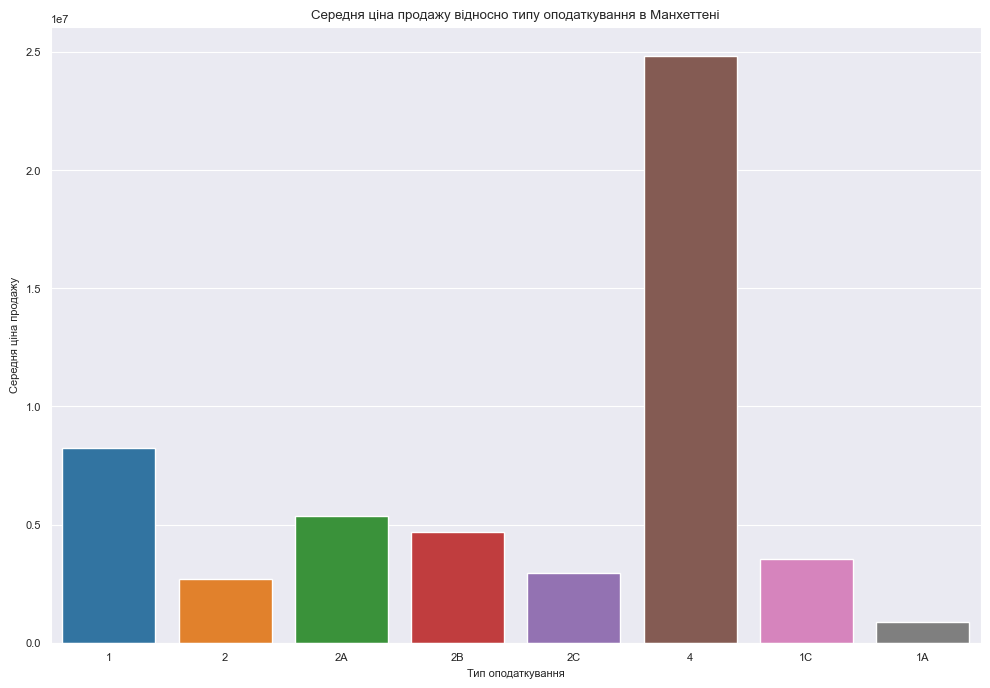

In [148]:

manhattan_data = df[(df['BOROUGH'] == 'Manhattan') & (df['SALE PRICE'] > 50)]

plt.figure(figsize=(12, 8))
sns.barplot(x='TAX CLASS AT PRESENT', y='SALE PRICE', data=manhattan_data, estimator=np.mean, ci=None)
plt.title('Середня ціна продажу відносно типу оподаткування в Манхеттені')
plt.xlabel('Тип оподаткування')
plt.ylabel('Середня ціна продажу')

plt.show()


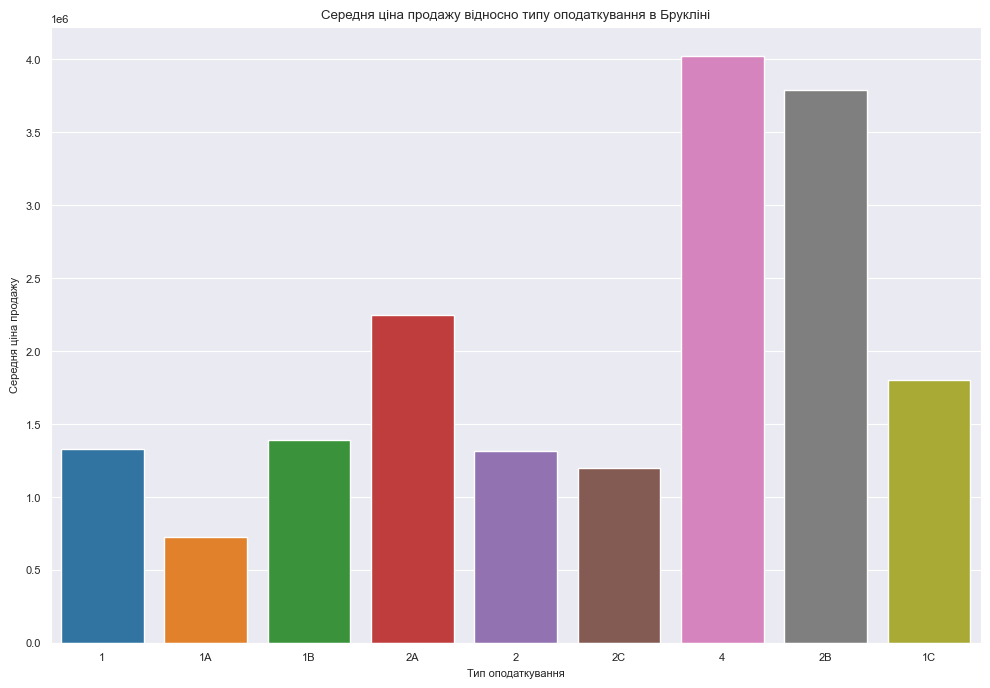

In [149]:

brooklyn_data = df[(df['BOROUGH'] == 'Brooklyn') & (df['SALE PRICE'] > 50)]


plt.figure(figsize=(12, 8))
sns.barplot(x='TAX CLASS AT PRESENT', y='SALE PRICE', data=brooklyn_data, estimator=np.mean, ci=None)
plt.title('Середня ціна продажу відносно типу оподаткування в Брукліні')
plt.xlabel('Тип оподаткування')
plt.ylabel('Середня ціна продажу')

plt.show()


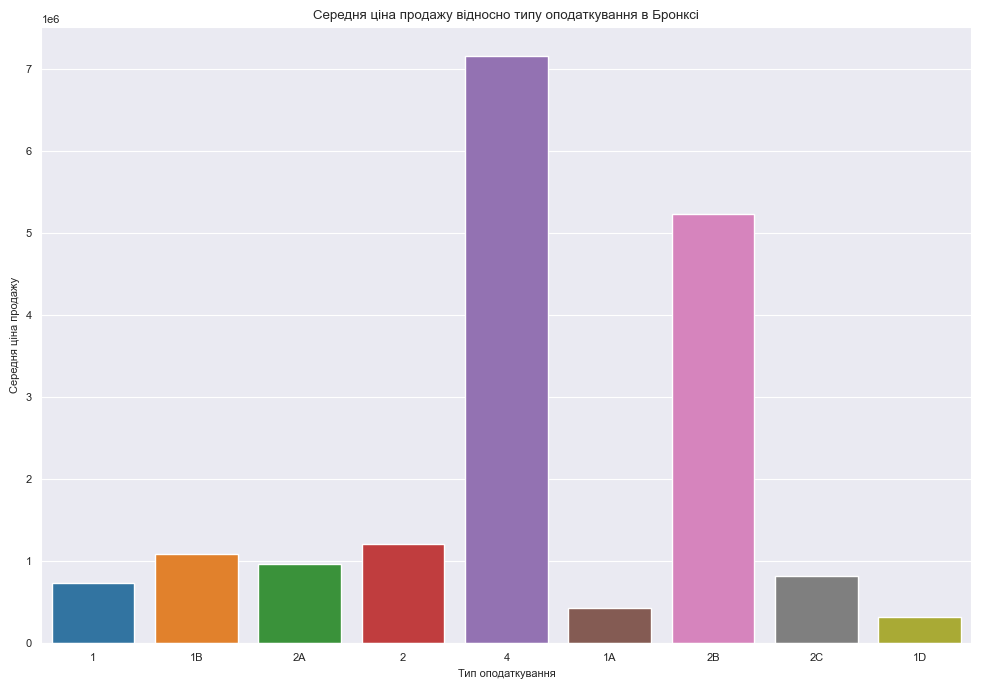

In [150]:

bronx_data = df[(df['BOROUGH'] == 'Bronx') & (df['SALE PRICE'] > 50)]

plt.figure(figsize=(12, 8))
sns.barplot(x='TAX CLASS AT PRESENT', y='SALE PRICE', data=bronx_data, estimator=np.mean, ci=None)
plt.title('Середня ціна продажу відносно типу оподаткування в Бронксі')
plt.xlabel('Тип оподаткування')
plt.ylabel('Середня ціна продажу')

plt.show()


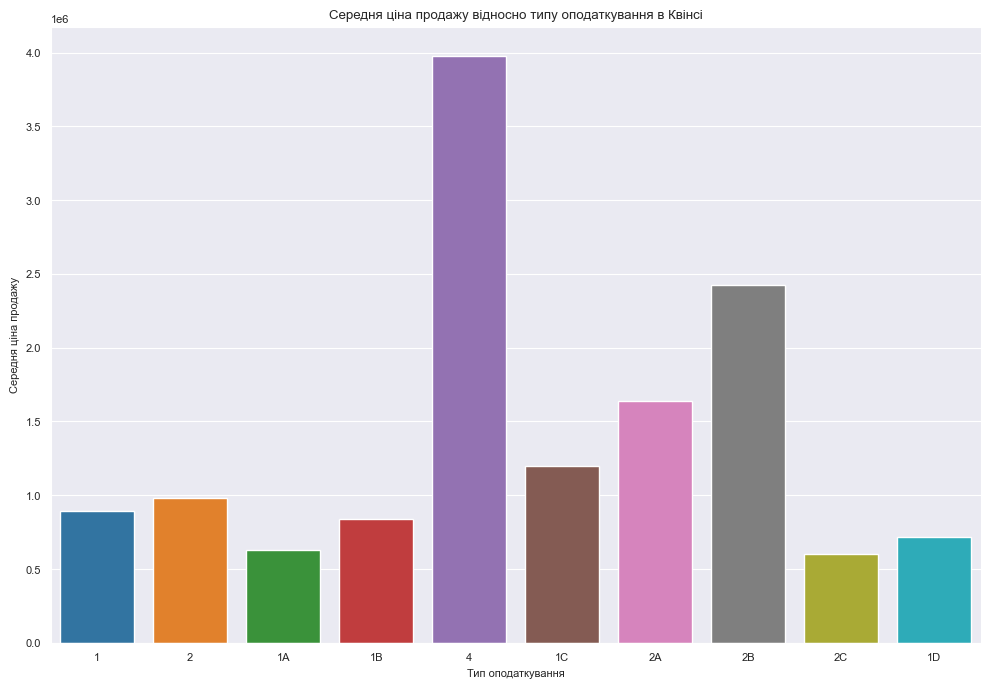

In [151]:

queens_data = df[(df['BOROUGH'] == 'Queens') & (df['SALE PRICE'] > 50)]

plt.figure(figsize=(12, 8))
sns.barplot(x='TAX CLASS AT PRESENT', y='SALE PRICE', data=queens_data, estimator=np.mean, ci=None)
plt.title('Середня ціна продажу відносно типу оподаткування в Квінсі')
plt.xlabel('Тип оподаткування')
plt.ylabel('Середня ціна продажу')

plt.show()


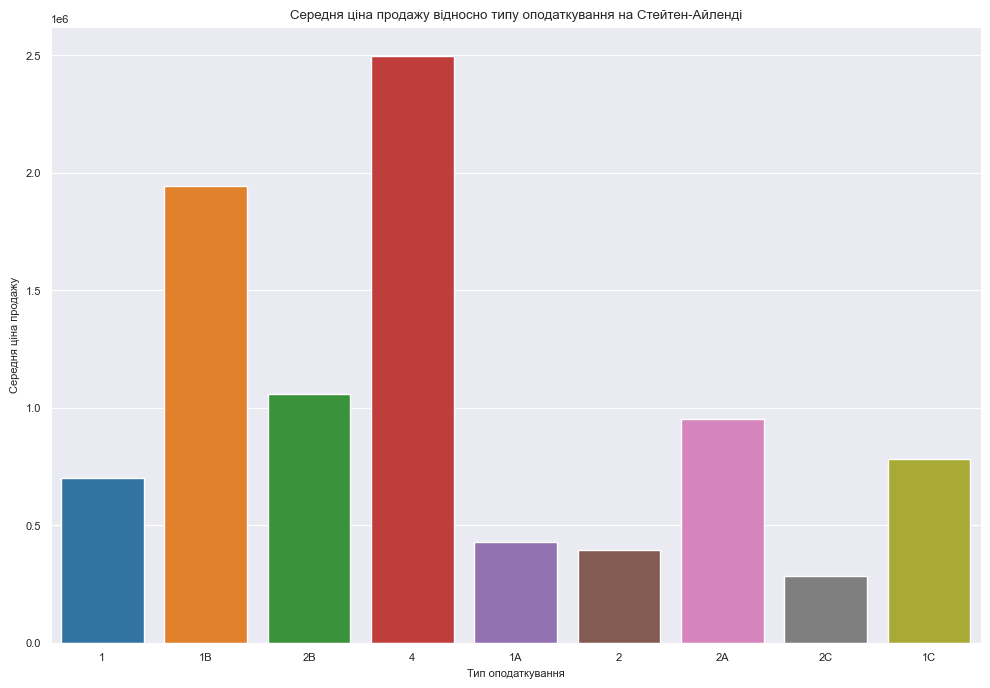

In [152]:

staten_island_data = df[(df['BOROUGH'] == 'Staten Island') & (df['SALE PRICE'] > 50)]

plt.figure(figsize=(12, 8))
sns.barplot(x='TAX CLASS AT PRESENT', y='SALE PRICE', data=staten_island_data, estimator=np.mean, ci=None)
plt.title('Середня ціна продажу відносно типу оподаткування на Стейтен-Айленді')
plt.xlabel('Тип оподаткування')
plt.ylabel('Середня ціна продажу')

plt.show()


Таким чином найбільша ціна за 4 типом оподаткування

Висновок. 
У ході нашого дослідження було ретельно розглянуто п'ять різних районів Нью-Йорка, розкриваючи різні аспекти ринку нерухомості у кожному з них. Ми детально проаналізували такі питання, як розподіл типів оподаткування нерухомості, класифікація будівель та їх розподіл за класами, а також динаміка ринку в залежності від року будівництва.

Наш аналіз вказує на те, що більшість районів мають переважання будівель з класом оподаткування 1. Однак в Манхеттені спостерігається переважання будівель класу 2, що свідчить про особливості проектування цього району. Деякі типи будівель, такі як офісні приміщення та склади, характеризуються найвищими цінами на продаж.

Наше дослідження також вказує на великі варіації цін на нерухомості в різних класах будівель. Загальна тенденція свідчить про те, що нежитлові споруди, зокрема офіси та склади, мають більш високі ціни продажу порівняно з іншими типами будівель. Також відзначається, що типи нежитлових будівель різняться в залежності від конкретного району міста.